7월 7일 기초데이터 확인

In [1]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,495 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and dire

In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Pandas 보기 옵션
pd.set_option('display.max_columns',100)

In [4]:
# 구글 코랩에서 한글 폰트를 설치합니다.
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 설치된 폰트를 확인합니다.
!fc-list :lang=ko

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGo

In [5]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] =False  # -1일때도 한글 안 깨짐

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

### 데이터 불러오기
파일을 불러옵니다.

In [7]:
# 메인 페이지 방문자 수
enter_page_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.main_page.csv', parse_dates=['client_event_time'])
enter_page_df.info()
enter_page_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133548 entries, 0 to 2133547
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_carrier     float64       
 4   device_family      object        
 5   device_type        object        
 6   event_type         object        
 7   language           object        
 8   os_name            object        
 9   os_version         object        
 10  platform           object        
 11  user_id            object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 195.3+ MB


,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-05 21:55:06.140,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
1,Dongdaemun-gu,2023-04-05 21:04:28.967,South Korea,NaN,Mac,Mac,enter.main_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4
2,Hwaseong-si,2023-04-05 21:01:31.258,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
3,Hwaseong-si,2023-04-05 21:02:50.374,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
4,Seoul,2023-04-05 21:30:33.727,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.main_page,Korean,Chrome,112.0.0.0,Web,NaN
5,Sejong,2023-04-05 21:36:02.749,South Korea,NaN,Apple iPhone,Apple iPhone 12 Mini,enter.main_page,Korean,Instagram,276.1.0.14.103,Web,NaN
6,Seoul,2023-04-05 21:37:37.469,South Korea,NaN,Samsung SM-S916N,NaN,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
7,Seoul,2023-04-05 21:37:42.563,South Korea,NaN,Samsung SM-S916N,NaN,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
8,Jung-gu,2023-04-05 21:55:29.031,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
9,Seoul,2023-04-05 21:05:40.020,South Korea,NaN,Apple iPhone,Apple iPhone,enter.main_page,Korean,Mobile Safari,16.4,Web,NaN


In [8]:
user_data = enter_page_df['user_id'].value_counts()
print("=== 유저 아이디, 방문회차 ===")
print(user_data)

user_data_yearly = enter_page_df.groupby(enter_page_df['client_event_time'].dt.year)['user_id'].value_counts()
print("=== 연도별 유저아이디, 방문회차 ===")
print(user_data_yearly)

# 결과 확인

=== 유저 아이디, 방문회차 ===
user_id
0555a42d8840da988b921cddd3b50019    3808
67732933a01750aae961eaebae75d106    3698
d3b2f51ede04364bd9861f8d261f26ec    2072
26ad178fe8a2c8b2f4a4195eefad041f    1742
e664e06c20a38f01f6144403060b8089    1713
                                    ... 
89f8d21b84bc575a12c16067e6d1be4a       1
d8bfc4fed40aec29967b45a238338e7e       1
e4ac08acedf28f37b4a2e51538e1660e       1
ff771cde224ee3c9159f2ffa8af511e7       1
84fcc424e58ba4d8f49c8e5dbccf35c7       1
Name: count, Length: 75365, dtype: int64
=== 연도별 유저아이디, 방문회차 ===
client_event_time  user_id                         
2021               032240163025c5d28708a444359d8664    2
                   66792460431cc9c2645600ed72a61992    2
                   141d97bf7a1e7270fbf7492cf160e5ea    1
                   195b844d180ac406c27673890eee9d21    1
                   976990eade46f23d9b1996aa7c3f5216    1
                                                      ..
2023               ffd86a14744bbde36e2034ab2301d78b    1
    

In [9]:
import pandas as pd

# 표시할 최대 행 수를 None(무제한)으로 설정
pd.set_option('display.max_rows', None)

# 이제 user_data_yearly를 출력해도 모든 행이 표시됩니다.
print(user_data_yearly)


# (참고) 만약 나중에 원래 설정으로 돌아가고 싶다면
# pd.reset_option('display.max_rows')
# 또는
# pd.set_option('display.max_rows', 60) # 기본값으로 되돌리기

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# 방법 A: unstack() 사용
user_data_table = user_data_yearly.unstack(level=0, fill_value=0) # level=0은 연도 인덱스를 의미
print(user_data_table)

# 방법 B: pivot_table 사용 (더 직관적일 수 있음)
# pivot_table을 쓰려면 'year' 컬럼을 명시적으로 만드는 것이 편합니다.
enter_page_df['year'] = enter_page_df['client_event_time'].dt.year
user_pivot_table = enter_page_df.pivot_table(
    index='user_id',
    columns='year',
    aggfunc='size', # size는 각 그룹의 크기(row 개수)를 셉니다.
    fill_value=0
)
print(user_pivot_table)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
eee8ef48093bfd8f98aea7f4977fb80f     0     0     3
eee9639180675f131d8183df2a9ef09e     0     2     0
eeea25930267e11cb192a0453c189fe0     0    16     0
eeecabac9c5a48adfc652b42a4bc6497     0     0     3
eeee2f702b59b7c4a383b9977a4e811e     0     6     0
eeee68e0f719641d7d4cfa62309e2efa     0     1     0
eeeea6e33f92d534260f7e1d042d7640     0     0     3
eeeebf9d12e2ee80500a6716d4ca2eaa     0     0     1
eeeefdacb67022dbb899fed8de7f231e     0     5     0
eeef122087b3c61e63918e5e3d66d977     0     4     0
eeef97e87ad68a03ebc3a985e490929a     0     1     0
eeefe0220b6969121b1ab5d4d99434a3     0     2     0
eef1cfe8827da4abdde6680cdc493a8f     0     0     1
eef20e82f864cdcb272273c290440f8b     0     2     0
eef3ad1d78cf9fe56f832403fc0cac33     0     0     2
eef4dbfb0a74e143e6124fd5b772f8f2     0     1     0
eef53df5f2f2b122dbd785a394205ffe     0     2     0
eef5f72da447b3e9e2e87d6d73ca1599     0     0     1
eef6b6f8ccc37d1764da763a7303f05f     0     3  

In [11]:
# 메인 페이지 방문자 수 연도별 고유 사용자 수

unique_users_yearly = enter_page_df.groupby(enter_page_df['client_event_time'].dt.year)['user_id'].nunique()

print(unique_users_yearly)

client_event_time
1978        0
2021       11
2022    56318
2023    25929
Name: user_id, dtype: int64


In [12]:

start_free_trial_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/start.free_trial.csv', parse_dates=['client_event_time'])
start_free_trial_df.info()
start_free_trial_df.head(10)

unique_start_free = start_free_trial_df.groupby(start_free_trial_df['client_event_time'].dt.year)['user_id'].nunique()

print(unique_start_free)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30621 entries, 0 to 30620
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               30133 non-null  object        
 1   client_event_time  30621 non-null  datetime64[ns]
 2   country            30491 non-null  object        
 3   device_carrier     0 non-null      float64       
 4   device_family      30499 non-null  object        
 5   device_type        30478 non-null  object        
 6   event_type         30621 non-null  object        
 7   language           30499 non-null  object        
 8   os_name            30499 non-null  object        
 9   os_version         30497 non-null  object        
 10  platform           30499 non-null  object        
 11  user_id            30607 non-null  object        
 12  plan.price         2439 non-null   float64       
 13  plan.type          2439 non-null   object        
dtypes: dat

In [13]:
enter_signup_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.signup_page.csv', parse_dates=['client_event_time'])
enter_signup_df.info()
enter_signup_df.head(10)
unique_enter_signup = enter_signup_df.groupby(enter_signup_df['client_event_time'].dt.year)['user_id'].nunique()

print(unique_enter_signup)

# 유저 아이디가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596829 entries, 0 to 596828
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               581024 non-null  object        
 1   client_event_time  596829 non-null  datetime64[ns]
 2   country            596315 non-null  object        
 3   device_carrier     0 non-null       float64       
 4   device_family      596747 non-null  object        
 5   device_type        567387 non-null  object        
 6   event_type         596829 non-null  object        
 7   language           596829 non-null  object        
 8   os_name            596754 non-null  object        
 9   os_version         594650 non-null  object        
 10  platform           596829 non-null  object        
 11  user_id            0 non-null       float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 54.6+ MB
client_event_time
2021    0
2022 

In [14]:
complete_signup_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.signup.csv', parse_dates=['client_event_time'])
complete_signup_df.info()
complete_signup_df.head(10)
unique_complete_signup = complete_signup_df.groupby(complete_signup_df['client_event_time'].dt.year)['user_id'].nunique()

print(unique_complete_signup)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145133 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_carrier     0 non-null       float64       
 4   device_family      45767 non-null   object        
 5   device_type        44659 non-null   object        
 6   event_type         145133 non-null  object        
 7   language           45767 non-null   object        
 8   os_name            45745 non-null   object        
 9   os_version         45651 non-null   object        
 10  platform           45767 non-null   object        
 11  user_id            145133 non-null  object        
 12  type               144958 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)

In [15]:
start_content_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/start.content.csv', parse_dates=['client_event_time'])
start_content_df.info()
start_content_df.head(10)

unique_start_content = start_content_df.groupby(start_content_df['client_event_time'].dt.year)['user_id'].nunique()

print(unique_start_content)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                121017 non-null  object        
 1   client_event_time   124917 non-null  datetime64[ns]
 2   country             122032 non-null  object        
 3   device_carrier      0 non-null       float64       
 4   device_family       122690 non-null  object        
 5   device_type         120068 non-null  object        
 6   event_type          124917 non-null  object        
 7   language            122692 non-null  object        
 8   os_name             122671 non-null  object        
 9   os_version          122585 non-null  object        
 10  platform            122692 non-null  object        
 11  user_id             124917 non-null  object        
 12  content.id          124917 non-null  object        
 13  content.difficulty  124917 no

In [16]:
import pandas as pd

# 파일을 100만 줄씩 나누어 읽기 위한 반복자 생성
chunk_iterator = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.lesson_page-002.csv',
    parse_dates=['client_event_time'],
    chunksize=1000000  # 100만 줄씩 처리. 컴퓨터 사양에 따라 조절 가능
)

# 예시: 각 chunk에서 연도별 사용자 수를 계산하여 합치기
yearly_counts = pd.Series(dtype=int)

print("Chunk 단위로 데이터 처리를 시작합니다...")
for i, chunk in enumerate(chunk_iterator):
    print(f"{i+1}번째 chunk 처리 중...")

    # 여기서 각 chunk에 대한 분석을 수행
    chunk_yearly_counts = chunk.groupby(chunk['client_event_time'].dt.year)['user_id'].nunique()

    # 결과 합산
    yearly_counts = yearly_counts.add(chunk_yearly_counts, fill_value=0)

print("\n--- 최종 분석 결과 ---")
print(yearly_counts)

Chunk 단위로 데이터 처리를 시작합니다...
1번째 chunk 처리 중...
2번째 chunk 처리 중...
3번째 chunk 처리 중...
4번째 chunk 처리 중...
5번째 chunk 처리 중...
6번째 chunk 처리 중...
7번째 chunk 처리 중...
8번째 chunk 처리 중...
9번째 chunk 처리 중...
10번째 chunk 처리 중...
11번째 chunk 처리 중...
12번째 chunk 처리 중...
13번째 chunk 처리 중...
14번째 chunk 처리 중...
15번째 chunk 처리 중...
16번째 chunk 처리 중...
17번째 chunk 처리 중...
18번째 chunk 처리 중...
19번째 chunk 처리 중...
20번째 chunk 처리 중...
21번째 chunk 처리 중...
22번째 chunk 처리 중...

--- 최종 분석 결과 ---
client_event_time
2021        28.0
2022    167831.0
2023    219653.0
dtype: float64


In [17]:
lesson_complete_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.lesson.csv', parse_dates=['client_event_time'])
lesson_complete_df.info()
lesson_complete_df.head(10)

lesson_complete = lesson_complete_df.groupby(lesson_complete_df['client_event_time'].dt.year)['user_id'].nunique()

print(lesson_complete)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5405069 entries, 0 to 5405068
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_carrier     float64       
 4   device_family      object        
 5   device_type        object        
 6   event_type         object        
 7   language           object        
 8   os_name            object        
 9   os_version         object        
 10  platform           object        
 11  user_id            object        
 12  content.id         object        
 13  lesson.id          object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 577.3+ MB
client_event_time
2022    18280
2023    35644
Name: user_id, dtype: int64


In [18]:
enter_content_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.content_page.csv', parse_dates=['client_event_time'])
enter_content_df.info()
enter_content_df.head(10)

enter_content = enter_content_df.groupby(enter_content_df['client_event_time'].dt.year)['user_id'].nunique()

print(enter_content)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914257 entries, 0 to 1914256
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_carrier     float64       
 4   device_family      object        
 5   device_type        object        
 6   event_type         object        
 7   language           object        
 8   os_name            object        
 9   os_version         object        
 10  platform           object        
 11  user_id            object        
 12  content.id         object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 189.9+ MB
client_event_time
2021       21
2022    34497
2023    45201
Name: user_id, dtype: int64


In [19]:
start_content_click_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/click.content_page_start_content_button.csv', parse_dates=['client_event_time'])
start_content_click_df.info()
start_content_click_df.head(10)

start_content_click = start_content_click_df.groupby(start_content_df['client_event_time'].dt.year)['user_id'].nunique()

print(start_content_click)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172911 entries, 0 to 172910
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               169437 non-null  object        
 1   client_event_time  172911 non-null  datetime64[ns]
 2   country            171495 non-null  object        
 3   device_carrier     0 non-null       float64       
 4   device_family      172911 non-null  object        
 5   device_type        171581 non-null  object        
 6   event_type         172911 non-null  object        
 7   language           172911 non-null  object        
 8   os_name            172911 non-null  object        
 9   os_version         172593 non-null  object        
 10  platform           172911 non-null  object        
 11  user_id            128361 non-null  object        
 12  content.id         172699 non-null  object        
 13  button.name        86242 non-null   object  

In [20]:
end_content_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/end.content.csv', parse_dates=['client_event_time'])
end_content_df.info()
end_content_df.head(10)

end_content = end_content_df.groupby(end_content_df['client_event_time'].dt.year)['user_id'].nunique()

print(end_content)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120582 entries, 0 to 120581
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               116280 non-null  object        
 1   client_event_time  120582 non-null  datetime64[ns]
 2   country            117182 non-null  object        
 3   device_carrier     0 non-null       float64       
 4   device_family      119391 non-null  object        
 5   device_type        118866 non-null  object        
 6   event_type         120582 non-null  object        
 7   language           119392 non-null  object        
 8   os_name            119387 non-null  object        
 9   os_version         119362 non-null  object        
 10  platform           119392 non-null  object        
 11  user_id            120582 non-null  object        
 12  content.id         120582 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)

In [21]:
sub_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.subscription.csv', parse_dates=['client_event_time'])
renew_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/renew.subscription.csv', parse_dates=['client_event_time'])
resub_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/resubscribe.subscription.csv', parse_dates=['client_event_time'])

sub = sub_df.groupby(sub_df['client_event_time'].dt.year)['user_id'].nunique()
renew = renew_df.groupby(renew_df['client_event_time'].dt.year)['user_id'].nunique()
resub = resub_df.groupby(resub_df['client_event_time'].dt.year)['user_id'].nunique()
print("=== 구독 관련 데이터 ===")
print("구독 시작:", sub)
print("구독 갱신:", renew)
print("재구독:", resub)

# 1. 분석할 전체 연도 목록 구하기 (세 데이터프레임에 있는 모든 연도 포함)
all_years = set(sub_df['client_event_time'].dt.year.unique()) \
            | set(renew_df['client_event_time'].dt.year.unique()) \
            | set(resub_df['client_event_time'].dt.year.unique())

# 각 연도별 중복된 사용자수 계산


# 2. 연도별로 결과를 저장할 딕셔너리 생성
yearly_union_users = {}


# 3. 연도별로 반복하며 합집합 사용자 수 계산
for year in sorted(list(all_years)):
    # 각 연도에 해당하는 데이터 필터링
    sub_users_set = set(sub_df[sub_df['client_event_time'].dt.year == year]['user_id'].dropna())
    renew_users_set = set(renew_df[renew_df['client_event_time'].dt.year == year]['user_id'].dropna())
    resub_users_set = set(resub_df[resub_df['client_event_time'].dt.year == year]['user_id'].dropna())


    # 세 그룹의 합집합(union) 계산
    union_set = sub_users_set.union(renew_users_set).union(resub_users_set)
    # 또는 | 연산자 사용: union_set = sub_users_set | renew_users_set | resub_users_set

    # 합집합의 크기(사용자 수)를 딕셔너리에 저장
    yearly_union_users[year] = len(union_set)

# 4. 최종 결과 출력
print("연도별 '구독 또는 갱신 또는 재구독'한 총 사용자 수:")
print(pd.Series(yearly_union_users))




=== 구독 관련 데이터 ===
구독 시작: client_event_time
2022    6596
2023    7302
Name: user_id, dtype: int64
구독 갱신: client_event_time
2022    2939
2023    5563
Name: user_id, dtype: int64
재구독: client_event_time
2022    151
2023    621
Name: user_id, dtype: int64
연도별 '구독 또는 갱신 또는 재구독'한 총 사용자 수:
2022     7647
2023    10369
dtype: int64


In [22]:
import pandas as pd

# (이전 코드는 동일)
all_years = set(sub_df['client_event_time'].dt.year.unique()) | \
            set(renew_df['client_event_time'].dt.year.unique()) | \
            set(resub_df['client_event_time'].dt.year.unique())

yearly_union_users = {}
yearly_intersection_analysis = {} # 분석 결과를 저장할 딕셔너리 추가

for year in sorted(list(all_years)):
    sub_users_set = set(sub_df[sub_df['client_event_time'].dt.year == year]['user_id'].dropna())
    renew_users_set = set(renew_df[renew_df['client_event_time'].dt.year == year]['user_id'].dropna())
    resub_users_set = set(resub_df[resub_df['client_event_time'].dt.year == year]['user_id'].dropna())

    # --- 기존 합집합 계산 (변경 없음) ---
    union_set = sub_users_set | renew_users_set | resub_users_set
    yearly_union_users[year] = len(union_set)

    # --- [추가된 부분] 교집합을 통한 중복 사용자 분석 ---
    # 1. 신규 구독과 갱신을 모두 한 사용자 (sub ∩ renew)
    sub_and_renew = sub_users_set.intersection(renew_users_set)

    # 2. 갱신과 재구독을 모두 한 사용자 (renew ∩ resub)
    renew_and_resub = renew_users_set.intersection(resub_users_set)

    # 3. 세 가지를 모두 한 사용자 (sub ∩ renew ∩ resub)
    all_three = sub_users_set & renew_users_set & resub_users_set

    # 연도별 분석 결과 저장
    yearly_intersection_analysis[year] = {
        'sub_and_renew': len(sub_and_renew),
        'renew_and_resub': len(renew_and_resub),
        'all_three': len(all_three),
        'sub_only': len(sub_users_set), # 참고: 각 그룹의 순수 사용자 수
        'renew_only': len(renew_users_set),
        'resub_only': len(resub_users_set)
    }

# --- 최종 결과 출력 ---
print("--- 연도별 총 유료 사용자 수 (합집합) ---")
print(pd.Series(yearly_union_users))

print("\n--- 연도별 중복 사용자 분석 (교집합) ---")
print(pd.DataFrame(yearly_intersection_analysis).T) # .T로 행/열 전환 출력 보기 좋게!

--- 연도별 총 유료 사용자 수 (합집합) ---
2022     7647
2023    10369
dtype: int64

--- 연도별 중복 사용자 분석 (교집합) ---
      sub_and_renew  renew_and_resub  all_three  sub_only  renew_only  \
2022           1919               84         45      6596        2939   
2023           2703              388        109      7302        5563   

      resub_only  
2022         151  
2023         621  


In [23]:
# 질문 페이지
lesson_question_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/click.lesson_page_related_question_box.csv', parse_dates=['client_event_time'])
lesson_question_df.info()
lesson_question_df.head(10)

lesson_question = lesson_question_df.groupby(lesson_question_df['client_event_time'].dt.year)['user_id'].nunique()

print(lesson_question)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379136 entries, 0 to 1379135
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   city               1355675 non-null  object        
 1   client_event_time  1379136 non-null  datetime64[ns]
 2   country            1364245 non-null  object        
 3   device_carrier     0 non-null        float64       
 4   device_family      1379135 non-null  object        
 5   device_type        1372802 non-null  object        
 6   event_type         1379136 non-null  object        
 7   language           1379136 non-null  object        
 8   os_name            1379135 non-null  object        
 9   os_version         1378923 non-null  object        
 10  platform           1379136 non-null  object        
 11  user_id            1326233 non-null  object        
 12  question.id        824789 non-null   object        
 13  content.id         824788 n

In [24]:
# 더 많은 리뷰 버튼
click_review_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/click.content_page_more_review_button.csv', parse_dates=['client_event_time'])
click_review_df.info()
click_review_df.head(10)

click_review = click_review_df.groupby(click_review_df['client_event_time'].dt.year)['user_id'].nunique()

print(click_review)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               93792 non-null  object        
 1   client_event_time  93962 non-null  datetime64[ns]
 2   country            93944 non-null  object        
 3   device_carrier     0 non-null      float64       
 4   device_family      93962 non-null  object        
 5   device_type        93909 non-null  object        
 6   event_type         93962 non-null  object        
 7   language           93962 non-null  object        
 8   os_name            93962 non-null  object        
 9   os_version         93959 non-null  object        
 10  platform           93962 non-null  object        
 11  user_id            10702 non-null  object        
 12  content.id         93938 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 9.

7월 8일 화요일

In [25]:
# 메인 페이지 들어온 인원 중 비회원 파악
missing_values_per_column = enter_page_df.isnull().sum()

print("========= 메인 페이지 결측값===========")
print(missing_values_per_column)

yearly_missing_counts = enter_page_df.groupby(
    enter_page_df['client_event_time'].dt.year
).apply(lambda x: x.isnull().sum())

print("========= 연도별 메인 페이지 결측값 개수 ===========")
print(yearly_missing_counts)

# 연도별로 그룹화한 뒤, 각 그룹 내 결측값의 '비율'을 계산
yearly_missing_ratio = enter_page_df.groupby(
    enter_page_df['client_event_time'].dt.year
).apply(lambda x: (x.isnull().sum() / len(x)) * 100)

print("\n========= 연도별 메인 페이지 결측값 비율(%) ===========")
print(yearly_missing_ratio)

# 특히 '비회원 비율' 추이를 보고 싶다면
print("\n--- 연도별 비회원(user_id 결측) 방문 비율 ---")
print(yearly_missing_ratio['user_id'])


missing_ratio = (enter_page_df.isnull().sum() / len(enter_page_df)) * 100
print("--- 컬럼별 결측값 비율(%) ---")
print(missing_ratio)

# 메인 페이지에 들어온 사람들 인원 파악
# --- 1단계: 각 데이터프레임에서 user_id를 set으로 변환 ---
# .dropna()로 결측값을 제거하고, .unique()로 중복을 미리 제거한 뒤 set으로 만듭니다.

main_page = set(enter_page_df['user_id'].dropna().unique())
complete_sign = set(complete_signup_df['user_id'].dropna().unique())


# --- 2단계: 집합 연산을 통해 각 그룹의 개수 계산 ---

# ① 두 데이터프레임에 모두 포함된 공통 사용자 수 (교집합)
common_users_count = len(main_page.intersection(complete_sign))
# 또는: common_users_count = len(set1 & set2)
# ②-1: df1에만 있고 df2에는 없는 사용자 수 (차집합)
only_in_df1_count = len(main_page.difference(complete_sign))
# 또는: only_in_df1_count = len(set1 - set2)


# ②-2: df2에만 있고 df1에는 없는 사용자 수 (차집합)
only_in_df2_count = len(complete_sign.difference(main_page))
# 또는: only_in_df2_count = len(set2 - set1)


# --- 3단계: 결과 출력 ---
print(f"df1의 고유 사용자 수: {len(main_page)}")
print(f"df2의 고유 사용자 수: {len(complete_sign)}")
print("-" * 30)
print(f"공통 사용자 수 (df1 ∩ df2): {common_users_count}")
print(f"df1에만 있는 사용자 수: {only_in_df1_count}")
print(f"df2에만 있는 사용자 수: {only_in_df2_count}")

========= 메인 페이지 결측값===========
city                   56988
client_event_time          0
country                 1869
device_carrier       2133548
device_family           2813
device_type            60050
event_type                 0
language                   0
os_name                 2304
os_version             13868
platform                   0
user_id              1611032
year                       0
dtype: int64
========= 연도별 메인 페이지 결측값 개수 ===========
                    city  client_event_time  country  device_carrier  \
client_event_time                                                      
1978                   0                  0        0              10   
2021                   1                  0        0              38   
2022               27020                  0      828         1062888   
2023               29967                  0     1041         1070612   

                   device_family  device_type  event_type  language  os_name  \
client_event_time        

In [26]:
# 각 데이터프레임에 'year' 컬럼 추가
enter_page_df['year'] = enter_page_df['client_event_time'].dt.year
complete_signup_df['year'] = complete_signup_df['client_event_time'].dt.year

# 'year'와 'user_id'가 모두 일치하는 경우를 찾기 위해 inner-join
# 이렇게 하면 공통 사용자의 연도별 데이터만 남게 됨
merged_df = pd.merge(
    enter_page_df[['user_id', 'year']],
    complete_signup_df[['user_id', 'year']],
    on=['user_id', 'year'],
    how='inner'
)

# 중복 제거 후 연도별로 그룹화하여 개수 세기
yearly_common_users_count_merge = merged_df.drop_duplicates().groupby('year')['user_id'].count()

print("\n--- 메인페이지와 회원가입 완료 연도별 공통 사용자 수 ---")
print(yearly_common_users_count_merge)


--- 메인페이지와 회원가입 완료 연도별 공통 사용자 수 ---
year
2022    38231
2023    15469
Name: user_id, dtype: int64


In [27]:
import pandas as pd

# 1. 각 데이터프레임에 'year' 컬럼 추가
enter_page_df['year'] = enter_page_df['client_event_time'].dt.year
complete_signup_df['year'] = complete_signup_df['client_event_time'].dt.year

# 2. 'outer' join을 사용하여 두 그룹의 모든 사용자를 통합하고, 출처를 표시
#    on=['year', 'user_id'] 로 연도와 사용자 모두를 키로 사용
#    먼저 drop_duplicates()로 각 연도별 고유 사용자를 만든다
merged_df = pd.merge(
    enter_page_df[['user_id', 'year']].drop_duplicates(),
    complete_signup_df[['user_id', 'year']].drop_duplicates(),
    on=['user_id', 'year'],
    how='outer',          # 'outer': 모든 사용자를 포함 (합집합)
    indicator=True        # 'indicator': 출처를 알려주는 '_merge' 컬럼 생성
)

# 3. 연도별로 그룹화한 뒤, '_merge' 컬럼의 값(출처)을 카운트
analysis_result = merged_df.groupby('year')['_merge'].value_counts()

# 4. 결과를 보기 좋은 표(DataFrame) 형태로 변환
analysis_table = analysis_result.unstack(fill_value=0)

# 5. 분석 목적에 맞게 컬럼 이름 변경 및 최종 결과 계산
analysis_table.rename(columns={
    'left_only': 'enter_page_only_users',
    'right_only': 'complete_signup_only_users',
    'both': 'common_users'
}, inplace=True)

# enter_page의 전체 고유 사용자 수 = (enter_page에만 있는 사용자 + 공통 사용자)
analysis_table['enter_page_total_users'] = analysis_table['enter_page_only_users'] + analysis_table['common_users']

# complete_signup의 전체 고유 사용자 수 = (complete_signup에만 있는 사용자 + 공통 사용자)
analysis_table['complete_signup_total_users'] = analysis_table['complete_signup_only_users'] + analysis_table['common_users']


print("\n--- 연도별 사용자 그룹 분석 결과 ---")
# 분석에 필요한 주요 컬럼만 원하는 순서대로 재정렬하여 출력
final_report = analysis_table[[
    'enter_page_total_users',
    'complete_signup_total_users',
    'common_users',
    'enter_page_only_users',
    'complete_signup_only_users'
]]
print(final_report)


--- 연도별 사용자 그룹 분석 결과 ---
_merge  enter_page_total_users  complete_signup_total_users  common_users  \
year                                                                        
1978                         1                            0             0   
2021                        12                            0             0   
2022                     56319                        58387         38231   
2023                     25930                        86746         15469   

_merge  enter_page_only_users  complete_signup_only_users  
year                                                       
1978                        1                           0  
2021                       12                           0  
2022                    18088                       20156  
2023                    10461                       71277  


In [28]:
# 1-1. enter_page_df에서 user_id가 없는 비회원 데이터만 추출
non_members_main_df = enter_page_df[enter_page_df['user_id'].isnull()].copy()

# 1-2. enter lesson df에서 유저 아이디 없는 것의 개수 확인
import pandas as pd

# 파일을 100만 줄씩 나누어 읽기 위한 반복자 생성
try:
    chunk_iterator = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.main_page.csv',
        parse_dates=['client_event_time'],
        chunksize=1000000  # 100만 줄씩 처리
    )
except FileNotFoundError:
    print("파일 경로를 다시 확인해주세요.")
    chunk_iterator = [] # 에러 방지를 위해 빈 리스트 할당


# 연도별로 결과를 저장할 빈 Series 생성
yearly_null_counts = pd.Series(dtype=int)

print("Chunk 단위로 user_id 결측값 분석을 시작합니다...")

# for 루프를 돌면서 각 chunk 처리
for i, chunk in enumerate(chunk_iterator):
    print(f"{i+1}번째 chunk 처리 중...")

    # 1. user_id가 null인 행만 필터링
    null_user_chunk = chunk[chunk['user_id'].isnull()]

    # 2. 만약 해당 chunk에 null인 데이터가 없다면 다음으로 넘어감
    if null_user_chunk.empty:
        continue

    # 3. 필터링된 데이터(null_user_chunk)를 연도별로 그룹화하여 개수 세기
    chunk_yearly_null_counts = null_user_chunk.groupby(
        null_user_chunk['client_event_time'].dt.year
    ).size()  # .size()는 그룹의 크기(행의 수)를 계산합니다.

    # 4. 계산된 chunk 결과를 전체 결과에 합산
    yearly_null_counts = yearly_null_counts.add(chunk_yearly_null_counts, fill_value=0)

print("\n--- 최종 분석 결과 ---")
print("연도별 user_id 결측값(null) 개수:")
print(yearly_null_counts.astype(int))




Chunk 단위로 user_id 결측값 분석을 시작합니다...
1번째 chunk 처리 중...
2번째 chunk 처리 중...
3번째 chunk 처리 중...

--- 최종 분석 결과 ---
연도별 user_id 결측값(null) 개수:
client_event_time
1978        10
2021        25
2022    641386
2023    969611
dtype: int64


In [29]:
import pandas as pd

# 1. 결과를 담을 빈 리스트 생성
null_chunks_list = []

# 2. 파일을 chunk 단위로 읽기 위한 반복자 생성
try:
    chunk_iterator = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.lesson_page-002.csv',
        parse_dates=['client_event_time'],
        chunksize=1000000
    )
except FileNotFoundError:
    print("파일 경로를 다시 확인해주세요.")
    chunk_iterator = []

print("Chunk 단위로 user_id가 null인 데이터 추출을 시작합니다...")

# 3. 각 chunk를 순회하며 null 데이터 추출 및 리스트에 추가
for i, chunk in enumerate(chunk_iterator):
    print(f"{i+1}번째 chunk 처리 중...")

    # 현재 chunk에서 user_id가 null인 행만 추출
    null_rows = chunk[chunk['user_id'].isnull()]

    # 만약 null인 행이 있다면, 리스트에 추가
    if not null_rows.empty:
        null_chunks_list.append(null_rows)

# 4. 리스트에 모인 모든 조각들을 하나의 데이터프레임으로 합치기
if null_chunks_list:
    # 리스트가 비어있지 않을 때만 concat 실행
    null_id_enter_lesson_df = pd.concat(null_chunks_list, ignore_index=True)

    # 5. 최종 결과 확인
    print("\n--- 최종 결과 ---")
    print(f"추출된 'user_id'가 null인 데이터의 총 개수: {len(null_id_enter_lesson_df)}")
    print("--- 추출된 데이터 샘플 ---")
    print(null_id_enter_lesson_df.head())

else:
    print("\n'user_id'가 null인 데이터가 발견되지 않았습니다.")
    # 만약 null인 데이터가 하나도 없다면 빈 데이터프레임 생성
    null_id_enter_lesson_df = pd.DataFrame()

Chunk 단위로 user_id가 null인 데이터 추출을 시작합니다...
1번째 chunk 처리 중...
2번째 chunk 처리 중...
3번째 chunk 처리 중...
4번째 chunk 처리 중...
5번째 chunk 처리 중...
6번째 chunk 처리 중...
7번째 chunk 처리 중...
8번째 chunk 처리 중...
9번째 chunk 처리 중...
10번째 chunk 처리 중...
11번째 chunk 처리 중...
12번째 chunk 처리 중...
13번째 chunk 처리 중...
14번째 chunk 처리 중...
15번째 chunk 처리 중...
16번째 chunk 처리 중...
17번째 chunk 처리 중...
18번째 chunk 처리 중...
19번째 chunk 처리 중...
20번째 chunk 처리 중...
21번째 chunk 처리 중...
22번째 chunk 처리 중...

--- 최종 결과 ---
추출된 'user_id'가 null인 데이터의 총 개수: 1538529
--- 추출된 데이터 샘플 ---
  city       client_event_time      country  device_carrier device_family  \
0  NaN 2023-04-05 21:04:19.774  South Korea             NaN       Windows   
1  NaN 2023-04-05 21:16:34.067  South Korea             NaN       Windows   
2  NaN 2023-04-05 21:28:46.441  South Korea             NaN       Windows   
3  NaN 2023-04-05 21:36:06.042  South Korea             NaN       Windows   
4  NaN 2023-04-05 21:40:59.422  South Korea             NaN       Windows   

  device_typ

In [30]:
import pandas as pd
from google.colab import drive
import os

# --- 1단계: 구글 드라이브 마운트 ---
# 이 코드를 실행하면 인증을 위한 링크와 코드를 입력하라는 창이 나타납니다.
# 안내에 따라 인증을 완료해주세요.
drive.mount('/content/drive')

# --- 2단계: 저장할 경로 및 파일 이름 설정 ---
# 내 드라이브(MyDrive) 안에 'colab_data'라는 폴더를 만들어 저장하는 것을 추천합니다.
drive_path = "/content/drive/MyDrive/codeit/Colab Notebooks/project2/"
file_name_drive = "null_id_enter_lesson.csv"

# 만약 폴더가 없다면, 자동으로 생성해주는 코드입니다.
os.makedirs(drive_path, exist_ok=True)

# --- 3단계: 파일 저장 ---
# 전체 경로를 포함하여 저장합니다.
full_path = drive_path + file_name_drive
null_id_enter_lesson_df.to_csv(full_path, index=False, encoding='utf-8-sig')

print(f"✅ 성공! 데이터프레임이 구글 드라이브 경로 '{full_path}'에 영구적으로 저장되었습니다.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 성공! 데이터프레임이 구글 드라이브 경로 '/content/drive/MyDrive/codeit/Colab Notebooks/project2/null_id_enter_lesson.csv'에 영구적으로 저장되었습니다.


In [31]:
null_id_enter_lesson_df=pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/null_id_enter_lesson.csv',  parse_dates=['client_event_time'])

fingerprint_cols= ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date

complete_signup_df['fingerprint'] = complete_signup_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
complete_signup_df['date'] = complete_signup_df['client_event_time'].dt.date

attributed_df = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'client_event_time', 'event_type', 'content.id']], # `user_id`는 null이므로 필요 없음
    complete_signup_df[['date', 'fingerprint', 'user_id', 'client_event_time']],
    on=['date', 'fingerprint'],
    suffixes=('_non_member', '_signup')
)

attributed_df = attributed_df[attributed_df['client_event_time_non_member'] < attributed_df['client_event_time_signup']].copy()

# 4-2. 시간 차이 계산
attributed_df['time_diff'] = attributed_df['client_event_time_signup'] - attributed_df['client_event_time_non_member']

# 4-3. 가장 가능성 높은 기록 선택 (drop_duplicates)
attributed_df.sort_values(by='time_diff', ascending=True, inplace=True)
final_attributed_signups = attributed_df.drop_duplicates(subset=['user_id', 'client_event_time_signup'], keep='first')

# 5. 최종 결과 확인
print("--- 비회원 유입경로 및 콘텐츠 분석 결과 (상위 10개) ---")
final_report = final_attributed_signups[['user_id', 'client_event_time_signup', 'content.id', 'time_diff']]
print(final_report.head(10))

print("\n--- 회원가입 기여도가 높은 콘텐츠 Top 10 ---")
print(final_attributed_signups['content.id'].value_counts().head(10))

--- 비회원 유입경로 및 콘텐츠 분석 결과 (상위 10개) ---
                                 user_id client_event_time_signup  \
140586  d000f604aac53070b9b0df9f2d8d6177  2023-09-01 04:35:04.020   
66455   e4e9fbb61644f072ea9305cf0590455b  2023-07-14 03:19:42.991   
222582  7e7d9bd1c47054c9b8e5f64492cb52d2  2023-07-07 07:09:47.286   
154358  d52040dc20f06bca0b69862c5f2f3e63  2023-08-01 07:36:10.924   
198657  0c5f3781949a6cbdbe258f9e55a76788  2023-08-30 06:37:17.527   
252975  640c54b3fa2a027281efaee6090ec54f  2023-11-15 10:24:48.514   
43947   bd2e9d9a66c87eecc93e5e6e96b396b1  2023-07-14 08:41:49.758   
195559  010a8eaf07235ab145f9e022a35879f3  2023-08-14 01:03:09.183   
160144  3268e69be9f693f08ace9ef5f630ae00  2023-08-01 11:44:57.118   
156167  dc3837abed36421a01b02e1b482401dd  2023-09-20 13:16:01.186   

                              content.id              time_diff  
140586  ca35d0138a7550f002f975310604a9b7 0 days 00:00:00.040000  
66455   b314d5aba64a0aab40602cb72a4a1504 0 days 00:00:00.073000  
2225

✅ 2. Starting data preparation...
    - Data has been filtered from 2022-01-01 to 2023-12-31.
✅ 3. Calculation of Top 5 monthly contents is complete.
✅ 4. Starting visualization...
    - Data spans multiple months. Generating line plot...


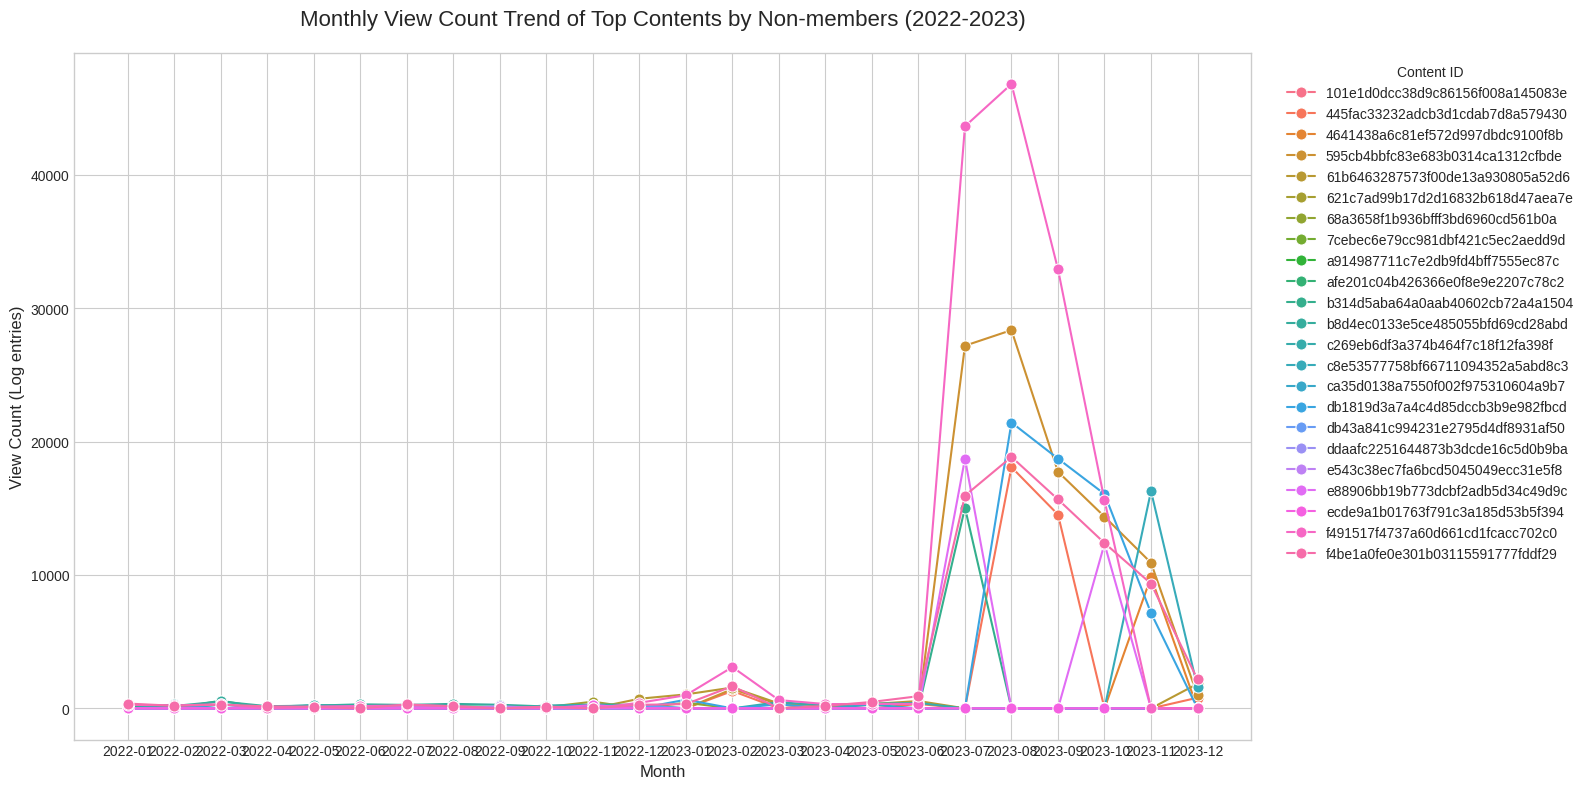

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (The font settings are no longer strictly necessary but are kept for good practice)
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ 2. Starting data preparation...")
# Define temp_df and filter for content.id
temp_df = null_id_enter_lesson_df.dropna(subset=['content.id']).copy()

# Filter the data for the specified date range
start_date = '2022-01-01'
end_date = '2023-12-31'
temp_df = temp_df[
    (temp_df['client_event_time'] >= start_date) &
    (temp_df['client_event_time'] <= end_date)
]
print(f"    - Data has been filtered from {start_date} to {end_date}.")

# -------------------- 3. Calculate Top 5 Contents per Month --------------------
if not temp_df.empty:
    temp_df['year_month'] = temp_df['client_event_time'].dt.to_period('M')

    monthly_top_lessons = temp_df.groupby('year_month').apply(
        lambda g: g['content.id'].value_counts().nlargest(5)
    )
    print("✅ 3. Calculation of Top 5 monthly contents is complete.")

    # -------------------- 4. Visualization --------------------
    print("✅ 4. Starting visualization...")
    if isinstance(monthly_top_lessons.index, pd.MultiIndex):
        print("    - Data spans multiple months. Generating line plot...")
        monthly_top_lessons.index.names = ['year_month', 'content.id']
        trend_df = monthly_top_lessons.unstack(level='content.id', fill_value=0)

        plt.figure(figsize=(16, 8))
        trend_df.index = trend_df.index.to_timestamp().strftime('%Y-%m')
        sns.lineplot(data=trend_df, marker='o', markersize=8, dashes=False)

        # --- [English Translation] ---
        plt.title('Monthly View Count Trend of Top Contents by Non-members (2022-2023)', fontsize=16, pad=20)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('View Count (Log entries)', fontsize=12)
        plt.legend(title='Content ID', bbox_to_anchor=(1.02, 1), loc='upper left')
        # --- [End of Translation] ---

    else: # If data is for a single month or less
        print("    - Data is for a single month. Generating bar plot...")
        trend_df = monthly_top_lessons.reset_index()
        trend_df.columns = ['content.id', 'view_count']
        single_month = temp_df['year_month'].unique()[0]

        plt.figure(figsize=(12, 7))
        sns.barplot(data=trend_df, x='content.id', y='view_count', palette='viridis')

        # --- [English Translation] ---
        plt.title(f'Top 5 Contents Viewed by Non-members in {single_month}', fontsize=16, pad=20)
        plt.ylabel('View Count (Log entries)', fontsize=12)
        plt.xlabel('Content ID', fontsize=12)
        # --- [End of Translation] ---

        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

else:
    print("❌ No data available for the specified period.")

In [33]:
import pandas as pd

# -------------------- 1단계: 분석 데이터 준비  --------------------
# 이 코드는 이전 시각화 코드와 동일하게, 분석의 일관성을 위해 그대로 실행
print("분석에 필요한 데이터를 준비합니다...")

# .dropna()로 분석에 필요한 'content.id'가 없는 행은 미리 제외합니다.
temp_df = null_id_enter_lesson_df.dropna(subset=['content.id']).copy()

# 분석할 시간 범위를 지정하고 데이터 필터링
start_date = '2022-01-01'
end_date = '2023-12-31'
temp_df = temp_df[
    (temp_df['client_event_time'] >= start_date) &
    (temp_df['client_event_time'] <= end_date)
]
temp_df['year_month'] = temp_df['client_event_time'].dt.to_period('M')
print("데이터 준비가 완료되었습니다.")


# -------------------- 2단계: 월별 Top 5 콘텐츠 계산 (기존 코드 재사용) --------------------
# 월별로 그룹화하여 각 그룹 내에서 content.id의 등장 횟수를 세고, 상위 5개를 추출
monthly_top_lessons = temp_df.groupby('year_month').apply(
    lambda g: g['content.id'].value_counts().nlargest(5)
)


# -------------------- 3단계: 결과를 보기 좋은 표(DataFrame) 형태로 변환 및 출력 --------------------
# [핵심] multi-index를 가진 Series를 일반적인 DataFrame으로 변환합니다.
top_lessons_table = monthly_top_lessons.reset_index()

# [핵심] DataFrame의 컬럼 이름을 더 이해하기 쉬운 한글로 변경합니다.
top_lessons_table.columns = ['연-월', '콘텐츠 ID', '시청 횟수']

# 최종 결과 출력
print("\n\n=============================================")
print("  [최종 결과] 월별 비회원 시청 Top 5 콘텐츠 목록")
print("=============================================")
# 데이터가 길 수 있으므로, 모든 행을 다 보여주도록 옵션을 설정합니다.
pd.set_option('display.max_rows', None)
print(top_lessons_table)
pd.reset_option('display.max_rows') # 다른 출력에 영향을 주지 않도록 옵션을 원래대로 복구

분석에 필요한 데이터를 준비합니다...
데이터 준비가 완료되었습니다.


  [최종 결과] 월별 비회원 시청 Top 5 콘텐츠 목록
         연-월                            콘텐츠 ID  시청 횟수
0    2022-01  f4be1a0fe0e301b03115591777fddf29    360
1    2022-01  f491517f4737a60d661cd1fcacc702c0    270
2    2022-01  621c7ad99b17d2d16832b618d47aea7e    175
3    2022-01  afe201c04b426366e0f8e9e2207c78c2    173
4    2022-01  7cebec6e79cc981dbf421c5ec2aedd9d    159
5    2022-02  c269eb6df3a374b464f7c18f12fa398f    291
6    2022-02  f491517f4737a60d661cd1fcacc702c0    219
7    2022-02  f4be1a0fe0e301b03115591777fddf29    193
8    2022-02  b8d4ec0133e5ce485055bfd69cd28abd    179
9    2022-02  7cebec6e79cc981dbf421c5ec2aedd9d    142
10   2022-03  afe201c04b426366e0f8e9e2207c78c2    576
11   2022-03  b8d4ec0133e5ce485055bfd69cd28abd    515
12   2022-03  f491517f4737a60d661cd1fcacc702c0    308
13   2022-03  db1819d3a7a4c4d85dccb3b9e982fbcd    291
14   2022-03  f4be1a0fe0e301b03115591777fddf29    281
15   2022-04  b8d4ec0133e5ce485055bfd69cd28abd    164
16   202

In [34]:
import pandas as pd
from google.colab import drive
import os

fingerprint_cols= ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date

complete_signup_df['fingerprint'] = complete_signup_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
complete_signup_df['date'] = complete_signup_df['client_event_time'].dt.date

attributed_df = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'client_event_time', 'event_type', 'content.id']], # `user_id`는 null이므로 필요 없음
    complete_signup_df[['date', 'fingerprint', 'user_id', 'client_event_time']],
    on=['date', 'fingerprint'],
    suffixes=('_non_member', '_signup')
)

attributed_df = attributed_df[attributed_df['client_event_time_non_member'] < attributed_df['client_event_time_signup']].copy()

# ---  저장할 경로 및 파일 이름 설정 ---
# 내 드라이브(MyDrive) 안에 'colab_data'라는 폴더를 만들어 저장하는 것을 추천합니다.
drive_path = "/content/drive/MyDrive/codeit/Colab Notebooks/project2/주제 2. 구독서비스 프로덕트 데이터 분석-20250707T023840Z-1-003"
file_name_drive = "attributed.csv"

# 만약 폴더가 없다면, 자동으로 생성해주는 코드
os.makedirs(drive_path, exist_ok=True)

# --- 3단계: 파일 저장 ---
# 전체 경로를 포함하여 저장합니다.
full_path = drive_path + file_name_drive
attributed_df.to_csv(full_path, index=False, encoding='utf-8-sig')

print(f"✅ 성공! 데이터프레임이 구글 드라이브 경로 '{full_path}'에 영구적으로 저장되었습니다.")

# 4-2. 시간 차이 계산
attributed_df['time_diff'] = attributed_df['client_event_time_signup'] - attributed_df['client_event_time_non_member']

# 4-3. 가장 가능성 높은 기록 선택 (drop_duplicates)
attributed_df.sort_values(by='time_diff', ascending=True, inplace=True)
final_attributed_signups = attributed_df.drop_duplicates(subset=['user_id', 'client_event_time_signup'], keep='first').copy()

# 5. 최종 결과 확인
print("--- 비회원 유입경로 및 콘텐츠 분석 결과 (상위 10개) ---")
final_report = final_attributed_signups[['user_id', 'client_event_time_signup', 'content.id', 'time_diff']]
print(final_report.head(10))

print("\n--- 회원가입 기여도가 높은 콘텐츠 Top 10 ---")
print(final_attributed_signups['content.id'].value_counts().head(10))



✅ 성공! 데이터프레임이 구글 드라이브 경로 '/content/drive/MyDrive/codeit/Colab Notebooks/project2/주제 2. 구독서비스 프로덕트 데이터 분석-20250707T023840Z-1-003attributed.csv'에 영구적으로 저장되었습니다.
--- 비회원 유입경로 및 콘텐츠 분석 결과 (상위 10개) ---
                                 user_id client_event_time_signup  \
140586  d000f604aac53070b9b0df9f2d8d6177  2023-09-01 04:35:04.020   
66455   e4e9fbb61644f072ea9305cf0590455b  2023-07-14 03:19:42.991   
222582  7e7d9bd1c47054c9b8e5f64492cb52d2  2023-07-07 07:09:47.286   
154358  d52040dc20f06bca0b69862c5f2f3e63  2023-08-01 07:36:10.924   
198657  0c5f3781949a6cbdbe258f9e55a76788  2023-08-30 06:37:17.527   
252975  640c54b3fa2a027281efaee6090ec54f  2023-11-15 10:24:48.514   
43947   bd2e9d9a66c87eecc93e5e6e96b396b1  2023-07-14 08:41:49.758   
195559  010a8eaf07235ab145f9e022a35879f3  2023-08-14 01:03:09.183   
160144  3268e69be9f693f08ace9ef5f630ae00  2023-08-01 11:44:57.118   
156167  dc3837abed36421a01b02e1b482401dd  2023-09-20 13:16:01.186   

                       

In [35]:
# 중복 제거 후 연도별로 그룹화하여 개수 세기
yearly_final_attribute_signups = final_attributed_signups.drop_duplicates().groupby(final_attributed_signups['client_event_time_signup'].dt.year)['user_id'].count()

print("\n--- 회원가입 전 유저의 레슨 수강 수 ---")
print(yearly_final_attribute_signups)


--- 회원가입 전 유저의 레슨 수강 수 ---
client_event_time_signup
2022    2286
2023    3646
Name: user_id, dtype: int64


In [36]:


# 1. 분석의 기준이 될 '연-월' 컬럼 생성
# .dt.to_period('M')을 사용하면 'YYYY-MM' 형식의 Period 객체가 생성되어 그룹화
final_report['year_month'] = final_report['client_event_time_signup'].dt.to_period('M')


# 2. 월별 Top 3 콘텐츠를 추출하는 함수 정의
def get_top3_contents(group):
    """
    하나의 월별 데이터 그룹(DataFrame)을 받아서,
    가장 많이 나타난 content.id 상위 3개를 Series 형태로 반환합니다.
    """
    return group['content.id'].value_counts().nlargest(3)


# 3. '연-월'로 그룹화한 뒤, 각 그룹에 get_top3_contents 함수 적용
monthly_top_contents = final_report.groupby('year_month').apply(get_top3_contents)


# 4. 최종 결과 확인
print("--- 월별 회원가입 기여 콘텐츠 Top 3 ---")
print(monthly_top_contents)



--- 월별 회원가입 기여 콘텐츠 Top 3 ---
year_month  content.id                      
2022-01     f4be1a0fe0e301b03115591777fddf29    39
            afe201c04b426366e0f8e9e2207c78c2    28
            b8d4ec0133e5ce485055bfd69cd28abd    18
2022-02     b8d4ec0133e5ce485055bfd69cd28abd    35
            f491517f4737a60d661cd1fcacc702c0    30
                                                ..
2023-11     c8e53577758bf66711094352a5abd8c3    30
            61b6463287573f00de13a930805a52d6    30
2023-12     c8e53577758bf66711094352a5abd8c3    42
            4641438a6c81ef572d997dbdc9100f8b    35
            61b6463287573f00de13a930805a52d6    32
Name: count, Length: 72, dtype: int64


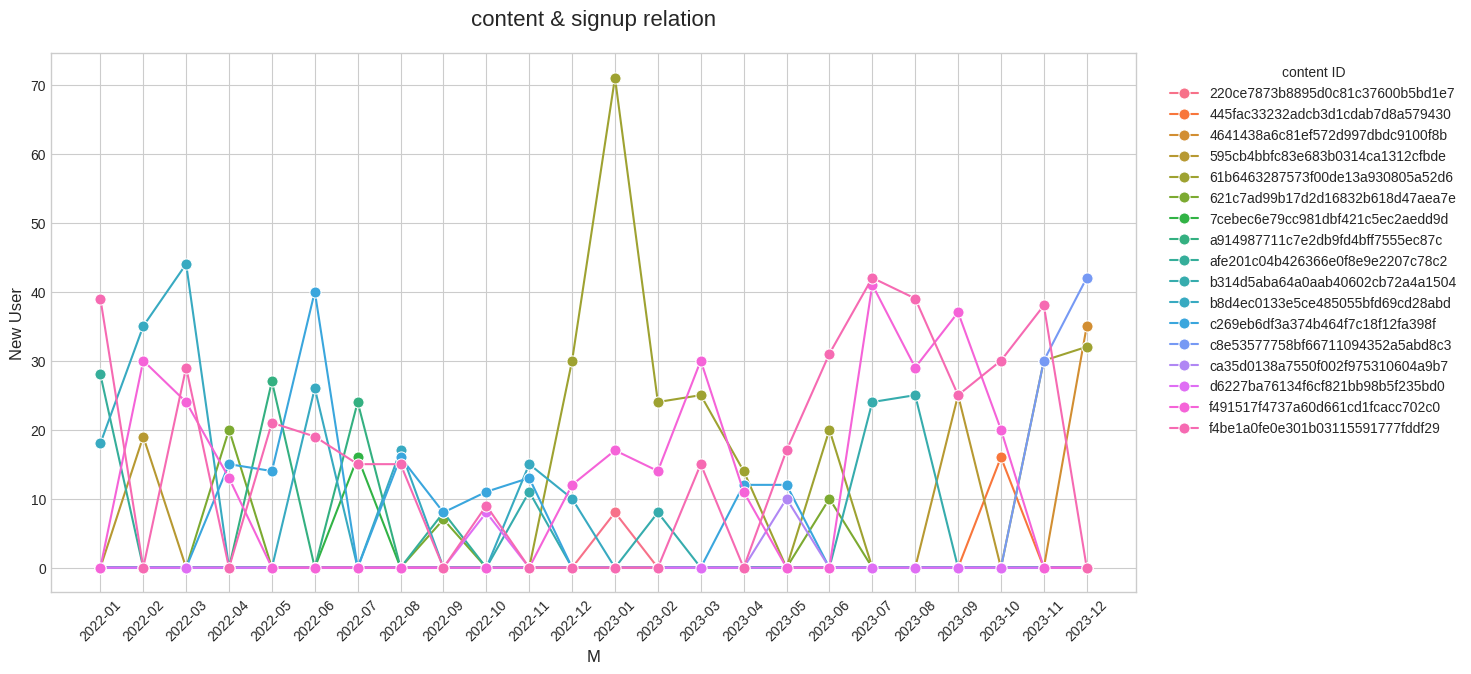

In [37]:
trend_df = monthly_top_contents.unstack(level='content.id', fill_value=0)

# .to_timestamp()는 Period 인덱스를 각 월의 1일 날짜(datetime)로 변환
# .strftime('%Y-%m')는 datetime을 'YYYY-MM' 형식의 문자열로 변환
trend_df.index = trend_df.index.to_timestamp().strftime('%Y-%m')


# 2. 그래프 그리기 (이제 정상적으로 작동합니다)
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_df, marker='o', markersize=8, dashes=False)

# 3. 그래프 꾸미기 (이전과 동일)
plt.title('content & signup relation', fontsize=16, pad=20)
plt.xlabel('M', fontsize=12)
plt.ylabel('New User', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='content ID', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

In [38]:
import pandas as pd

null_id_df_enter_page_df = enter_page_df[enter_page_df['user_id'].isnull()].copy() # 유저 아이디 공란인 데이터

fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

# .fillna('NA')를 사용하여 지문 생성 시 결측값으로 인한 문제를 방지합니다.
null_id_df_enter_page_df['fingerprint'] = null_id_df_enter_page_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
null_id_df_enter_page_df['date'] = null_id_df_enter_page_df['client_event_time'].dt.date

# 2. 시간순으로 데이터 정렬 (이것이 매우 중요!)
# ascending=True 이므로, 시간이 갈수록 아래쪽에 위치하게 됩니다.
null_id_df_enter_page_df.sort_values(by='client_event_time', ascending=True, inplace=True)

# 3. '날짜'와 '지문'이 같은 그룹 내에서 마지막 기록만 남기기
# keep='last' 옵션 덕분에, 정렬된 데이터의 가장 마지막 행이 살아남습니다.
unique_null_enter_page_df = null_id_df_enter_page_df.drop_duplicates(subset=['date', 'fingerprint'], keep='last')


# --- 결과 확인 ---
print("\n--- 분석 결과 ---")
print(f"원본 비회원 로그 수: {len(null_id_df_enter_page_df)}")
print(f"중복 제거 후 '일일 비회원 세션' 수: {len(unique_null_enter_page_df)}")

print("\n--- 비회원의 일일 마지막 활동 기록 ---")
# 분석에 유용한 컬럼들만 선택하여 확인
print(unique_null_enter_page_df[[
    'client_event_time', 'date', 'fingerprint', 'event_type'
]].head())



--- 분석 결과 ---
원본 비회원 로그 수: 1611032
중복 제거 후 '일일 비회원 세션' 수: 675344

--- 비회원의 일일 마지막 활동 기록 ---
              client_event_time        date  \
335232  1978-01-01 10:22:27.371  1978-01-01   
593046  1978-01-17 21:13:44.128  1978-01-17   
298406  1978-05-14 12:39:01.444  1978-05-14   
1236626 1978-06-22 13:49:53.470  1978-06-22   
1279461 1978-06-29 14:25:57.913  1978-06-29   

                                     fingerprint       event_type  
335232    Baltimore_Mac_Mac_Chrome_108.0.0.0_Web  enter.main_page  
593046    Baltimore_Mac_Mac_Chrome_109.0.0.0_Web  enter.main_page  
298406   Washington_Mac_Mac_Chrome_113.0.0.0_Web  enter.main_page  
1236626         Baltimore_Mac_Mac_Chrome_102_Web  enter.main_page  
1279461         Baltimore_Mac_Mac_Chrome_103_Web  enter.main_page  


In [65]:
import pandas as pd
from google.colab import drive
import os

drive_folder_path = "/content/drive/MyDrive/codeit/Colab Notebooks/project2/"

# 저장할 파일 이름을 정합니다.
file_name = "unique_null_enter_page.csv"

# [안전 장치] 만약 지정한 폴더가 없다면, 자동으로 생성해주는 코드입니다.
os.makedirs(drive_folder_path, exist_ok=True)


# -------------------- 3단계: DataFrame을 CSV 파일로 저장 --------------------
# [가정] unique_null_enter_page_df 라는 데이터프레임이 메모리에 생성되어 있는 상태여야 합니다.

try:
    # 전체 경로 = 폴더 경로 + 파일 이름
    full_path = drive_folder_path + file_name

    # .to_csv() 함수를 사용하여 데이터프레임을 CSV 파일로 저장합니다.
    # index=False 옵션은 데이터프레임의 인덱스(0, 1, 2...)가 불필요한 컬럼으로 저장되는 것을 막아줍니다.
    # encoding='utf-8-sig' 옵션은 나중에 엑셀에서 파일을 열었을 때 한글이 깨지지 않도록 도와줍니다.
    unique_null_enter_page_df.to_csv(full_path, index=False, encoding='utf-8-sig')

    print(f"\n✅ 성공! 데이터프레임이 아래 경로에 CSV 파일로 저장되었습니다.")
    print(f"   - 저장 위치: {full_path}")
    print("\n   Google 드라이브에서 파일을 직접 확인해보세요!")

except NameError:
    print("\n❌ 에러: 'unique_null_enter_page_df' 라는 이름의 데이터프레임이 존재하지 않습니다.")
    print("   - 이 코드를 실행하기 전에, 해당 데이터프레임을 만드는 코드가 먼저 실행되었는지 확인해주세요.")
except Exception as e:
    print(f"\n❌ 파일을 저장하는 중 예상치 못한 에러가 발생했습니다: {e}")


✅ 성공! 데이터프레임이 아래 경로에 CSV 파일로 저장되었습니다.
   - 저장 위치: /content/drive/MyDrive/codeit/Colab Notebooks/project2/unique_null_enter_page.csv

   Google 드라이브에서 파일을 직접 확인해보세요!


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 가정: 이전 단계에서 df 생성된 상태

# 1. '연도' 컬럼 생성
#    client_event_time을 사용합니다. date는 datetime 속성이 없습니다.
unique_null_enter_page_df['year'] = pd.to_datetime(unique_null_enter_page_df['client_event_time']).dt.year

# 2. '연도'로 그룹화한 뒤, 각 그룹 내에서 'event_type'의 빈도를 계산
yearly_main_page_null_id_counts = unique_null_enter_page_df.groupby('year')['event_type'].value_counts()

# 3. 결과 확인
print("--- 연도별 비회원 ---")
print(yearly_main_page_null_id_counts.groupby('year').nlargest(5))

--- 연도별 비회원 ---
year  year  event_type     
1978  1978  enter.main_page        10
2021  2021  enter.main_page        24
2022  2022  enter.main_page    247338
2023  2023  enter.main_page    427972
Name: count, dtype: int64


메인 페이지에서 날짜별 동일 데이터 제거 비회원은 89195명으로
2021년 3명, 2022년 13079명, 2023년 76113명이다.

In [40]:

# 에러가 발생하기 전에, enter_signup_df의 실제 컬럼 목록을 출력해 봅니다.
print("--- enter_signup_df의 실제 컬럼 목록 ---")
print(enter_signup_df.columns)

--- enter_signup_df의 실제 컬럼 목록 ---
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id'],
      dtype='object')


In [41]:
import pandas as pd

enter_signup_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.signup_page.csv',
                               parse_dates=['client_event_time'])

# 1. 핑거프린트 및 날짜 컬럼 생성
fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']
# .fillna('NA')를 추가하여 결측값 문제를 방지하는 것이 좋습니다.
enter_signup_df['fingerprint'] = enter_signup_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
enter_signup_df['date'] = enter_signup_df['client_event_time'].dt.date

# 2. 시간순으로 정렬
sorted_df = enter_signup_df.sort_values(by='client_event_time', ascending=True)

# 3. [핵심 수정] 'date'와 'fingerprint'를 기준으로 중복 제거 (keep='last'가 더 직관적일 수 있음)
#    같은 날, 같은 핑거프린트를 가진 기록 중 가장 마지막 기록만 남깁니다.
dedup_df = sorted_df.drop_duplicates(subset=['date', 'fingerprint'], keep='last')


# 4. 연도별로 중복 제거된 데이터의 '총 개수'를 계산
yearly_counts = dedup_df.groupby(dedup_df['client_event_time'].dt.year).size()


# 5. 결과 확인
print(f"원본 데이터 개수: {len(enter_signup_df)}")
print(f"중복 제거 후 데이터 개수: {len(dedup_df)}")
print("\n--- 연도별 일일 순수 방문 세션 수 ---")
print(yearly_counts)

원본 데이터 개수: 596829
중복 제거 후 데이터 개수: 322618

--- 연도별 일일 순수 방문 세션 수 ---
client_event_time
2021        19
2022    103242
2023    219357
dtype: int64


In [66]:
import pandas as pd
from google.colab import drive
import os

drive_folder_path = "/content/drive/MyDrive/codeit/Colab Notebooks/project2/"

# 저장할 파일 이름을 정합니다.
file_name = "unique_null_signup_page.csv"

# [안전 장치] 만약 지정한 폴더가 없다면, 자동으로 생성해주는 코드입니다.
os.makedirs(drive_folder_path, exist_ok=True)


# -------------------- 3단계: DataFrame을 CSV 파일로 저장 --------------------

try:
    # 전체 경로 = 폴더 경로 + 파일 이름
    full_path = drive_folder_path + file_name

    # .to_csv() 함수를 사용하여 데이터프레임을 CSV 파일로 저장합니다.
    # index=False 옵션은 데이터프레임의 인덱스(0, 1, 2...)가 불필요한 컬럼으로 저장되는 것을 막아줍니다.
    # encoding='utf-8-sig' 옵션은 나중에 엑셀에서 파일을 열었을 때 한글이 깨지지 않도록 도와줍니다.
    dedup_df.to_csv(full_path, index=False, encoding='utf-8-sig')

    print(f"\n✅ 성공! 데이터프레임이 아래 경로에 CSV 파일로 저장되었습니다.")
    print(f"   - 저장 위치: {full_path}")
    print("\n   Google 드라이브에서 파일을 직접 확인해보세요!")

except NameError:
    print("\n❌ 에러: 'unique_null_enter_page_df' 라는 이름의 데이터프레임이 존재하지 않습니다.")
    print("   - 이 코드를 실행하기 전에, 해당 데이터프레임을 만드는 코드가 먼저 실행되었는지 확인해주세요.")
except Exception as e:
    print(f"\n❌ 파일을 저장하는 중 예상치 못한 에러가 발생했습니다: {e}")


✅ 성공! 데이터프레임이 아래 경로에 CSV 파일로 저장되었습니다.
   - 저장 위치: /content/drive/MyDrive/codeit/Colab Notebooks/project2/unique_null_signup_page.csv

   Google 드라이브에서 파일을 직접 확인해보세요!


In [42]:
#import pandas as pd
#import os

#print("--- 1단계: 비회원 데이터 추출 시작 ---")

# 원본 파일과 중간 파일 경로 설정
#source_file = '/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.lesson_page-002.csv'
#intermediate_file = 'null_user_enter_lesson.csv' # 중간 저장될 파일 이름

# 파일을 chunk 단위로 읽기 위한 반복자 생성
#chunk_iterator = pd.read_csv(
#    source_file,
#    parse_dates=['client_event_time'],
#    chunksize=1000000
#)

# 중간 파일 생성 시작
#for i, chunk in enumerate(chunk_iterator):
#    print(f"  - {i+1}번째 chunk에서 비회원 데이터 필터링 중...")

    # user_id가 null인 행만 추출
#    null_rows = chunk[chunk['user_id'].isnull()]

    # 첫 번째 chunk는 헤더(컬럼 이름)와 함께 저장하고,
    # 그 이후 chunk는 헤더 없이 데이터만 추가(append)합니다.
#    if i == 0:
#       null_rows.to_csv(intermediate_file, index=False, mode='w', header=True)
#    else:
#       null_rows.to_csv(intermediate_file, index=False, mode='a', header=False)

# 중간 파일 크기 확인 (선택 사항)
#if os.path.exists(intermediate_file):
#    file_size_mb = os.path.getsize(intermediate_file) / (1024 * 1024)
#    print(f"\n✅ 1단계 완료: 비회원 데이터가 '{intermediate_file}' ({file_size_mb:.2f} MB) 파일로 저장되었습니다.")
#else:
#    print("\n❌ 1단계 실패: 비회원 데이터가 없거나 파일 저장에 실패했습니다.")

In [43]:
import pandas as pd

print("\n--- 2단계: 중복 제거 및 연도별 집계 시작 ---")

null_id_enter_lesson_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/null_id_enter_lesson.csv',
                                      parse_dates=['client_event_time'])


null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date
fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']
key_cols = ['date'] + fingerprint_cols

# 중복 제거 기준 컬럼
key_cols = ['date'] + fingerprint_cols

null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)

# 1. 시간순으로 내림차순 정렬
sorted_lesson = null_id_enter_lesson_df.sort_values(by='client_event_time', ascending=False)

# 2. 첫 번째 나오는 값(가장 마지막 시간)만 남기고 중복 제거
dedup_null_id_lesson_df = sorted_lesson.drop_duplicates(subset=key_cols, keep='first')

dedup_null_id_lesson_df['year'] = dedup_null_id_lesson_df['client_event_time'].dt.year
dedup_null_id_lesson = dedup_null_id_lesson_df['year'].value_counts().sort_index()

print("\n\n--- 최종 분석 결과 ---")
print("하루에 한 번, 동일 환경에서 접속한 비회원의 연도별 고유 활동 수:")
print(dedup_null_id_lesson)




--- 2단계: 중복 제거 및 연도별 집계 시작 ---


--- 최종 분석 결과 ---
하루에 한 번, 동일 환경에서 접속한 비회원의 연도별 고유 활동 수:
year
2021        3
2022    13079
2023    76113
Name: count, dtype: int64


In [44]:
import pandas as pd


# --- 1단계: 정리 대상(중복) 식별 ---
print("1단계: '엔터 페이지' 방문 비회원 중 '레슨 페이지'도 방문한 기록을 찾아냅니다...")
fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']
key_cols = ['date'] + fingerprint_cols

# 엔터 페이지 데이터를 기준으로, 레슨 페이지 데이터와 겹치는지 확인
merged_check = pd.merge(
    unique_null_enter_page_df,
    dedup_null_id_lesson_df[key_cols].drop_duplicates(), # 레슨 페이지 키는 중복 제거 후 사용
    on=key_cols,
    how='left',
    indicator=True
)


# --- 2단계: '엔터 페이지' 데이터에서 중복만 선별적으로 제거 ---
print("\n2단계: '엔터 페이지' 데이터에서 중복된 기록만 제거합니다...")

# _merge 컬럼이 'left_only'인, 즉 '레슨 페이지' 방문 기록과 겹치지 않는
# 순수한 '엔터 페이지' 방문 기록만 남깁니다.
is_pure_enter_page_only = (merged_check['_merge'] == 'left_only')
clean_enter_page_df = unique_null_enter_page_df[is_pure_enter_page_only.values]

print(f"  - 원본 엔터 페이지 비회원 데이터 개수: {len(unique_null_enter_page_df)}")
print(f"  - 정리 후 순수 엔터 페이지 비회원 데이터 개수: {len(clean_enter_page_df)}")



# --- 3단계: '레슨 페이지' 데이터와 정리된 '엔터 페이지' 데이터 최종 통합 ---
print("\n3단계: '레슨 페이지' 데이터와 정리된 '엔터 페이지' 데이터를 최종 통합합니다...")

# 레슨 페이지 방문 기록은 모두 살리고, 정리된 엔터 페이지 방문 기록을 합칩니다.
final_df = pd.concat([dedup_null_id_lesson_df, clean_enter_page_df], ignore_index=True)
print(f"  - 최종 데이터 개수: {len(final_df)}")


# --- 4단계: 최종 데이터를 연도별로 나누기 ---
print("\n4단계: 최종 데이터를 연도별로 집계합니다...")
if not final_df.empty:
    yearly_final_counts = final_df['client_event_time'].dt.year.value_counts().sort_index()

    print("\n" + "="*50)
    print("  [최종 결과] 정제된 연도별 전체 비회원 활동 수")
    print("="*50)
    print(yearly_final_counts)
else:
    print("\n최종 데이터가 없습니다.")

1단계: '엔터 페이지' 방문 비회원 중 '레슨 페이지'도 방문한 기록을 찾아냅니다...

2단계: '엔터 페이지' 데이터에서 중복된 기록만 제거합니다...
  - 원본 엔터 페이지 비회원 데이터 개수: 675344
  - 정리 후 순수 엔터 페이지 비회원 데이터 개수: 627264

3단계: '레슨 페이지' 데이터와 정리된 '엔터 페이지' 데이터를 최종 통합합니다...
  - 최종 데이터 개수: 716459

4단계: 최종 데이터를 연도별로 집계합니다...

  [최종 결과] 정제된 연도별 전체 비회원 활동 수
client_event_time
1978        10
2021        27
2022    251494
2023    464928
Name: count, dtype: int64


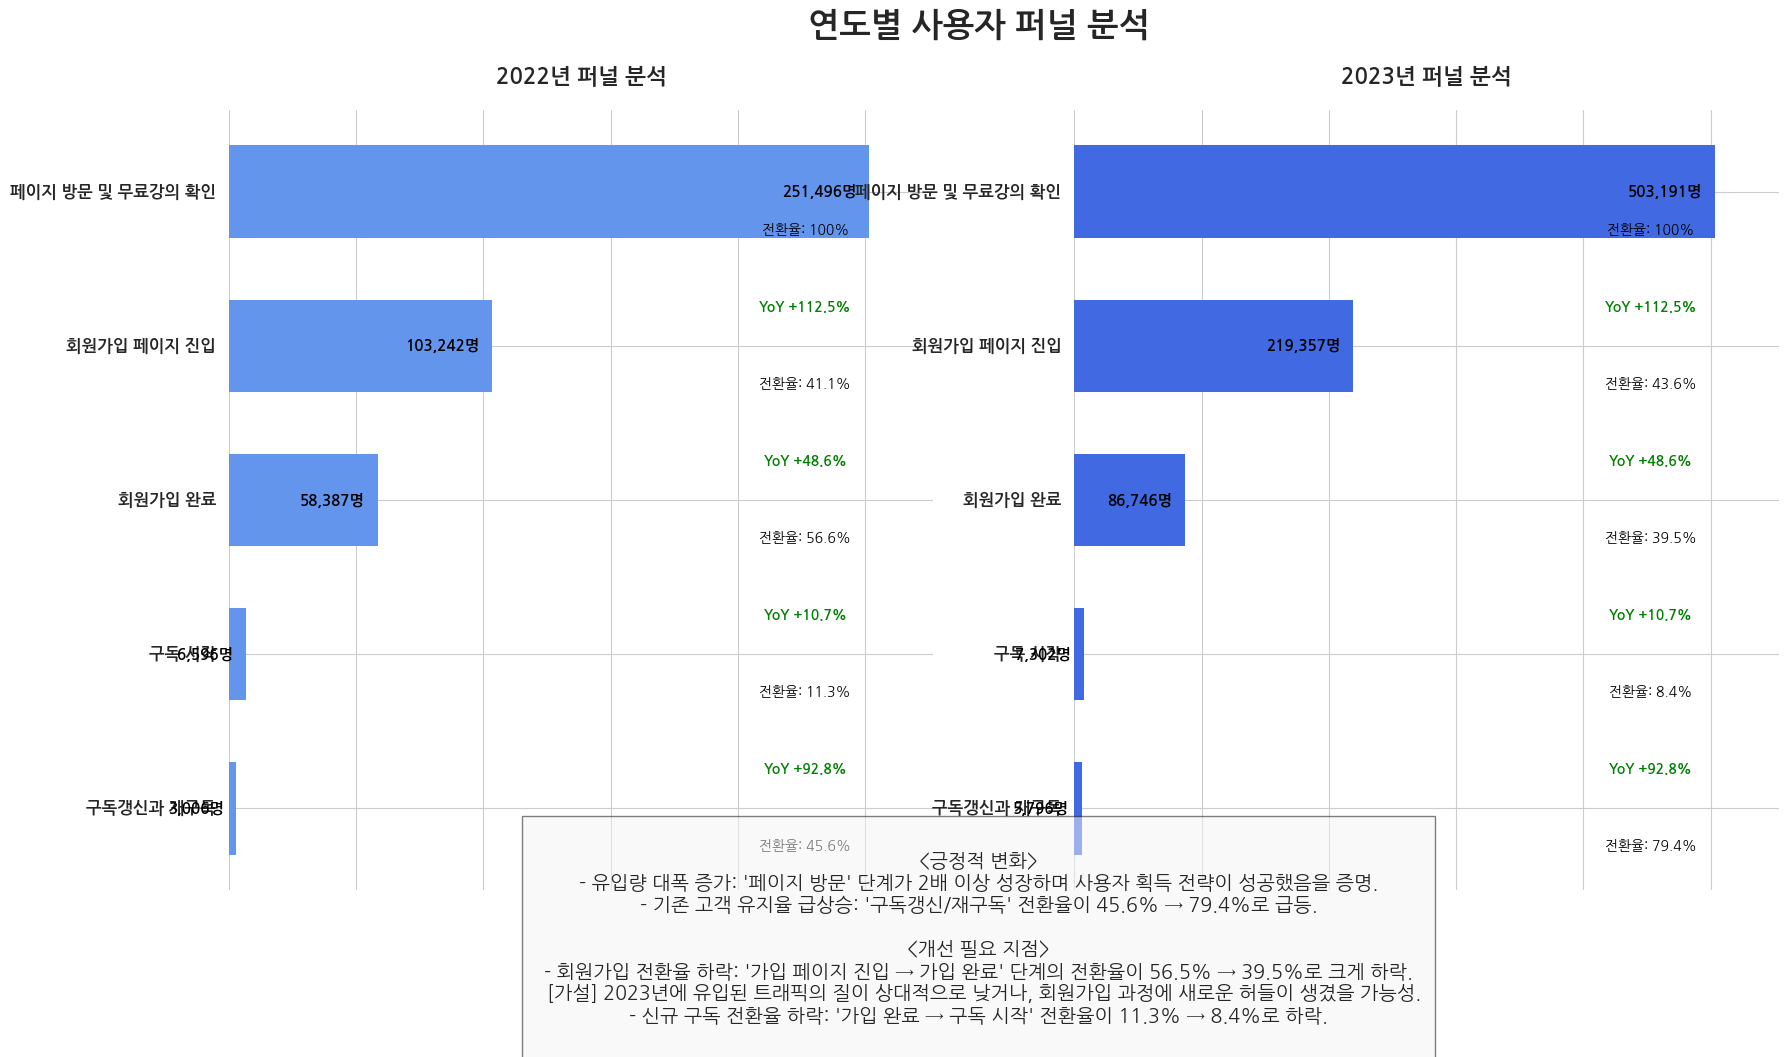

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# . 폰트 설정
plt.rc('font', family='NanumGothic')

#  마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# -------------------- 1단계: 데이터 준비 및 지표 계산 --------------------
# 기존에 직접 입력한 데이터를 사용합니다.
data = {
    '단계': ['페이지 방문 및 무료강의 확인', '회원가입 페이지 진입', '회원가입 완료', '구독 시작', '구독갱신과 재구독'],
    '2022년': [251496, 103242, 58387, 6596, 3006],
    '2023년': [503191, 219357, 86746, 7302, 5796]
}
df = pd.DataFrame(data).set_index('단계')

# [추가] 연간 성장률(YoY) 계산
df['YoY_성장률(%)'] = (df['2023년'] - df['2022년']) / df['2022년'] * 100

# [추가] 단계별 전환율 계산
df['2022_전환율(%)'] = (df['2022년'] / df['2022년'].shift(1) * 100).fillna(100)
df['2023_전환율(%)'] = (df['2023년'] / df['2023년'].shift(1) * 100).fillna(100)


# -------------------- 2단계: 시각화 함수 정의 --------------------
def plot_funnel_with_annotations(ax, year, data, yoy_data, conversion_data, color):
    """지정된 축(ax)에 퍼널 차트와 주석을 그리는 함수"""
    y_pos = np.arange(len(data))
    max_val = data.iloc[0] # 첫 번째 단계 값을 기준으로 너비 결정

    ax.barh(y_pos, data, color=color, height=0.6)
    ax.set_yticks(y_pos)
    ax.set_yticklabels('') # y축 라벨은 텍스트로 직접 추가
    ax.invert_yaxis() # 위에서 아래로 퍼널 모양이 되도록 y축 뒤집기
    ax.set_xlim(0, max_val * 1.1)

    # 테두리와 눈금 제거
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for i, (stage, value) in enumerate(data.items()):
        # 단계 이름
        ax.text(-max_val*0.02, i, stage, ha='right', va='center', fontsize=12, weight='bold')

        # 사용자 수
        ax.text(value - (max_val*0.02), i, f'{value:,}명', ha='right', va='center', color='black', fontsize=11, weight='bold')

        # 연간 성장률 (첫 단계 제외)
        if i > 0:
            growth = yoy_data.iloc[i]
            growth_text = f'YoY {growth:+.1f}%'
            growth_color = 'green' if growth > 0 else 'red'
            ax.text(max_val * 0.9, i-0.25, growth_text, ha='center', va='center', color=growth_color, fontsize=10, weight='bold')

        # 단계별 전환율
        conv_rate = conversion_data.iloc[i]
        conv_text = f'전환율: {conv_rate:.1f}%'
        if i == 0: conv_text = '전환율: 100%'
        ax.text(max_val * 0.9, i+0.25, conv_text, ha='center', va='center', color='black', fontsize=10, style='italic')

    ax.set_title(f"{year}년 퍼널 분석", fontsize=16, weight='bold', pad=20)


# -------------------- 3단계: 최종 리포트 시각화 --------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('연도별 사용자 퍼널 분석', fontsize=24, weight='bold')

# 각 연도별 퍼널 그리기
plot_funnel_with_annotations(ax1, 2022, df['2022년'], df['YoY_성장률(%)'], df['2022_전환율(%)'], 'cornflowerblue')
plot_funnel_with_annotations(ax2, 2023, df['2023년'], df['YoY_성장률(%)'], df['2023_전환율(%)'], 'royalblue')


# -------------------- 4단계: 가설 및 분석 텍스트 추가 --------------------
# figtext는 전체 그림(figure) 기준 좌표 (0,0) ~ (1,1)에 텍스트를 추가합니다.
analysis_text = """
<긍정적 변화>
- 유입량 대폭 증가: '페이지 방문' 단계가 2배 이상 성장하며 사용자 획득 전략이 성공했음을 증명.
- 기존 고객 유지율 급상승: '구독갱신/재구독' 전환율이 45.6% → 79.4%로 급등.

<개선 필요 지점>
- 회원가입 전환율 하락: '가입 페이지 진입 → 가입 완료' 단계의 전환율이 56.5% → 39.5%로 크게 하락.
  [가설] 2023년에 유입된 트래픽의 질이 상대적으로 낮거나, 회원가입 과정에 새로운 허들이 생겼을 가능성.
- 신규 구독 전환율 하락: '가입 완료 → 구독 시작' 전환율이 11.3% → 8.4%로 하락.
"""

plt.figtext(0.5, -0.05, analysis_text, ha="center", fontsize=14,
            bbox={"facecolor":"whitesmoke", "alpha":0.5, "pad":10}, wrap=True)

plt.subplots_adjust(bottom=0.1)
plt.show()

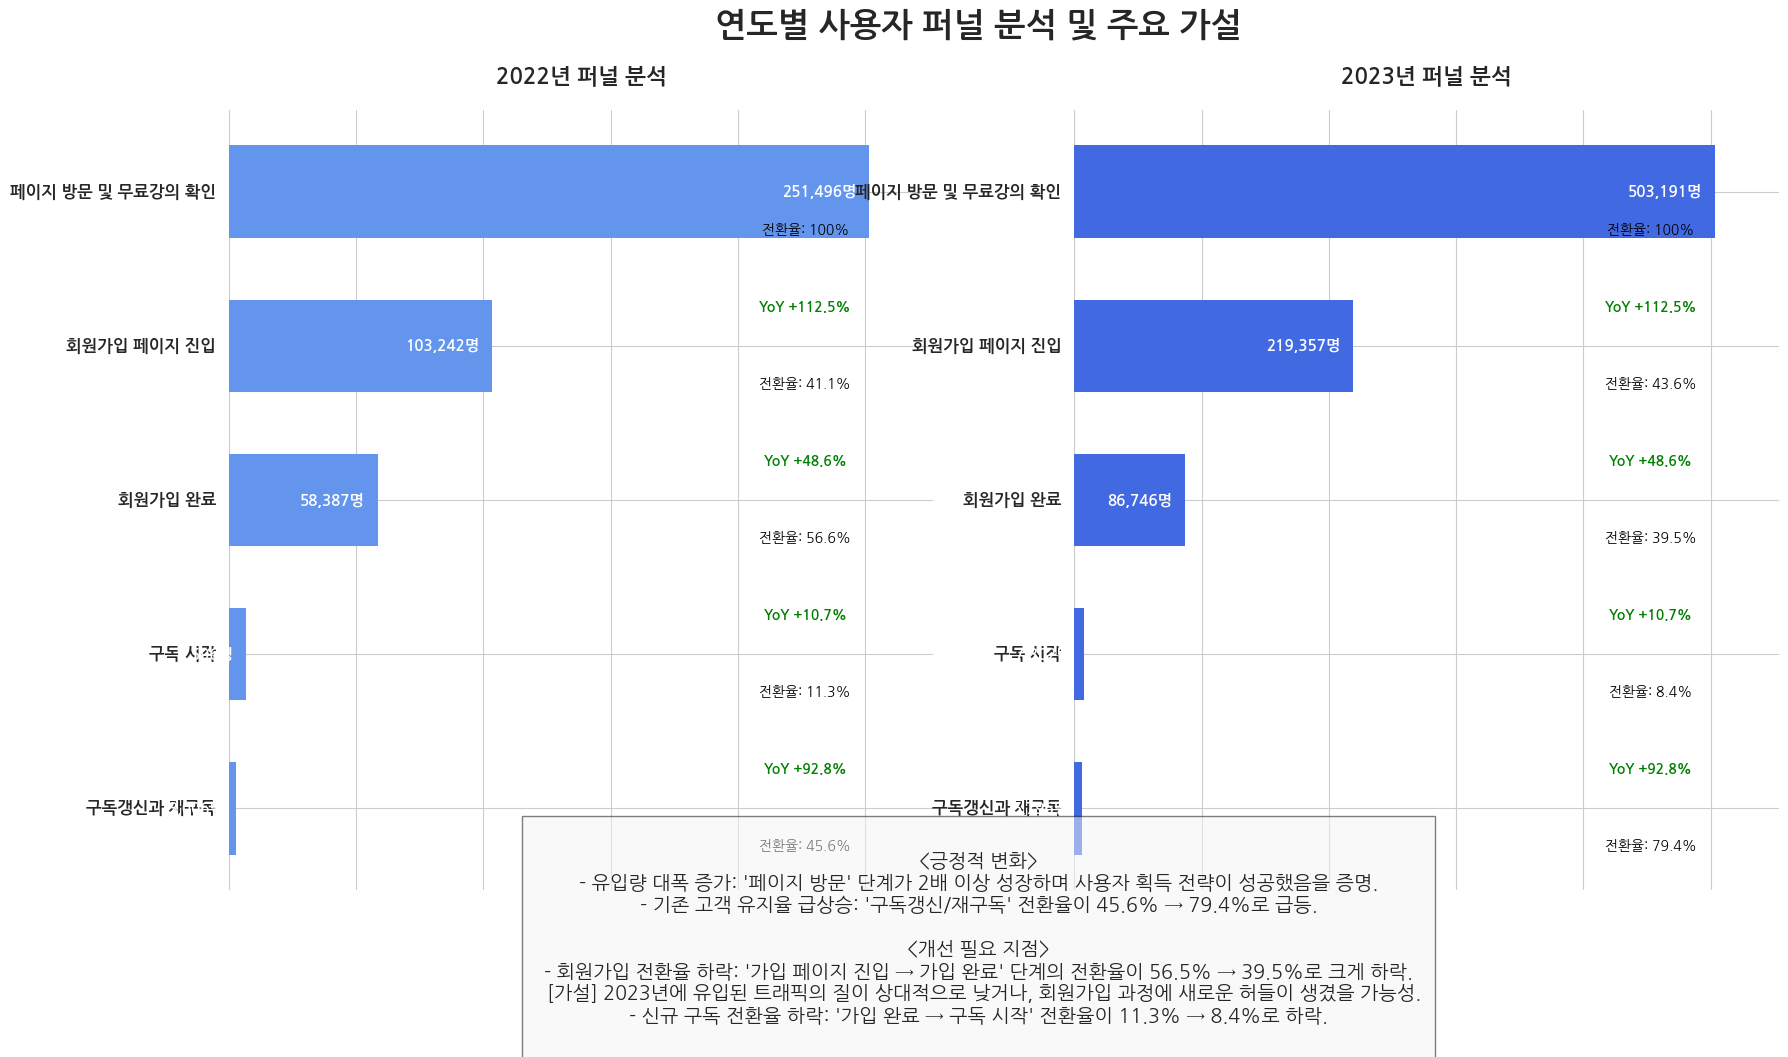

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- 1단계: 데이터 준비 및 지표 계산 --------------------
# 기존에 직접 입력한 데이터를 사용합니다.
data = {
    '단계': ['페이지 방문 및 무료강의 확인', '회원가입 페이지 진입', '회원가입 완료', '구독 시작', '구독갱신과 재구독'],
    '2022년': [251496, 103242, 58387, 6596, 3006],
    '2023년': [503191, 219357, 86746, 7302, 5796]
}
df = pd.DataFrame(data).set_index('단계')

# [추가] 연간 성장률(YoY) 계산
df['YoY_성장률(%)'] = (df['2023년'] - df['2022년']) / df['2022년'] * 100

# [추가] 단계별 전환율 계산
df['2022_전환율(%)'] = (df['2022년'] / df['2022년'].shift(1) * 100).fillna(100)
df['2023_전환율(%)'] = (df['2023년'] / df['2023년'].shift(1) * 100).fillna(100)


# -------------------- 2단계: 시각화 함수 정의 --------------------
def plot_funnel_with_annotations(ax, year, data, yoy_data, conversion_data, color):
    """지정된 축(ax)에 퍼널 차트와 주석을 그리는 함수"""
    y_pos = np.arange(len(data))
    max_val = data.iloc[0] # 첫 번째 단계 값을 기준으로 너비 결정

    ax.barh(y_pos, data, color=color, height=0.6)
    ax.set_yticks(y_pos)
    ax.set_yticklabels('') # y축 라벨은 텍스트로 직접 추가
    ax.invert_yaxis() # 위에서 아래로 퍼널 모양이 되도록 y축 뒤집기
    ax.set_xlim(0, max_val * 1.1)

    # 테두리와 눈금 제거
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for i, (stage, value) in enumerate(data.items()):
        # 단계 이름
        ax.text(-max_val*0.02, i, stage, ha='right', va='center', fontsize=12, weight='bold')

        # 사용자 수
        ax.text(value - (max_val*0.02), i, f'{value:,}명', ha='right', va='center', color='white', fontsize=11, weight='bold')

        # 연간 성장률 (첫 단계 제외)
        if i > 0:
            growth = yoy_data.iloc[i]
            growth_text = f'YoY {growth:+.1f}%'
            growth_color = 'green' if growth > 0 else 'red'
            ax.text(max_val * 0.9, i-0.25, growth_text, ha='center', va='center', color=growth_color, fontsize=10, weight='bold')

        # 단계별 전환율
        conv_rate = conversion_data.iloc[i]
        conv_text = f'전환율: {conv_rate:.1f}%'
        if i == 0: conv_text = '전환율: 100%'
        ax.text(max_val * 0.9, i+0.25, conv_text, ha='center', va='center', color='black', fontsize=10, style='italic')

    ax.set_title(f"{year}년 퍼널 분석", fontsize=16, weight='bold', pad=20)


# -------------------- 3단계: 최종 리포트 시각화 --------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('연도별 사용자 퍼널 분석 및 주요 가설', fontsize=24, weight='bold')

# 각 연도별 퍼널 그리기
plot_funnel_with_annotations(ax1, 2022, df['2022년'], df['YoY_성장률(%)'], df['2022_전환율(%)'], 'cornflowerblue')
plot_funnel_with_annotations(ax2, 2023, df['2023년'], df['YoY_성장률(%)'], df['2023_전환율(%)'], 'royalblue')


# -------------------- 4단계: 가설 및 분석 텍스트 추가 --------------------
# figtext는 전체 그림(figure) 기준 좌표 (0,0) ~ (1,1)에 텍스트를 추가합니다.
analysis_text = """
<긍정적 변화>
- 유입량 대폭 증가: '페이지 방문' 단계가 2배 이상 성장하며 사용자 획득 전략이 성공했음을 증명.
- 기존 고객 유지율 급상승: '구독갱신/재구독' 전환율이 45.6% → 79.4%로 급등.

<개선 필요 지점>
- 회원가입 전환율 하락: '가입 페이지 진입 → 가입 완료' 단계의 전환율이 56.5% → 39.5%로 크게 하락.
  [가설] 2023년에 유입된 트래픽의 질이 상대적으로 낮거나, 회원가입 과정에 새로운 허들이 생겼을 가능성.
- 신규 구독 전환율 하락: '가입 완료 → 구독 시작' 전환율이 11.3% → 8.4%로 하락.
"""

plt.figtext(0.5, -0.05, analysis_text, ha="center", fontsize=14,
            bbox={"facecolor":"whitesmoke", "alpha":0.5, "pad":10}, wrap=True)

plt.subplots_adjust(bottom=0.1) # 텍스트 공간 확보
plt.show()

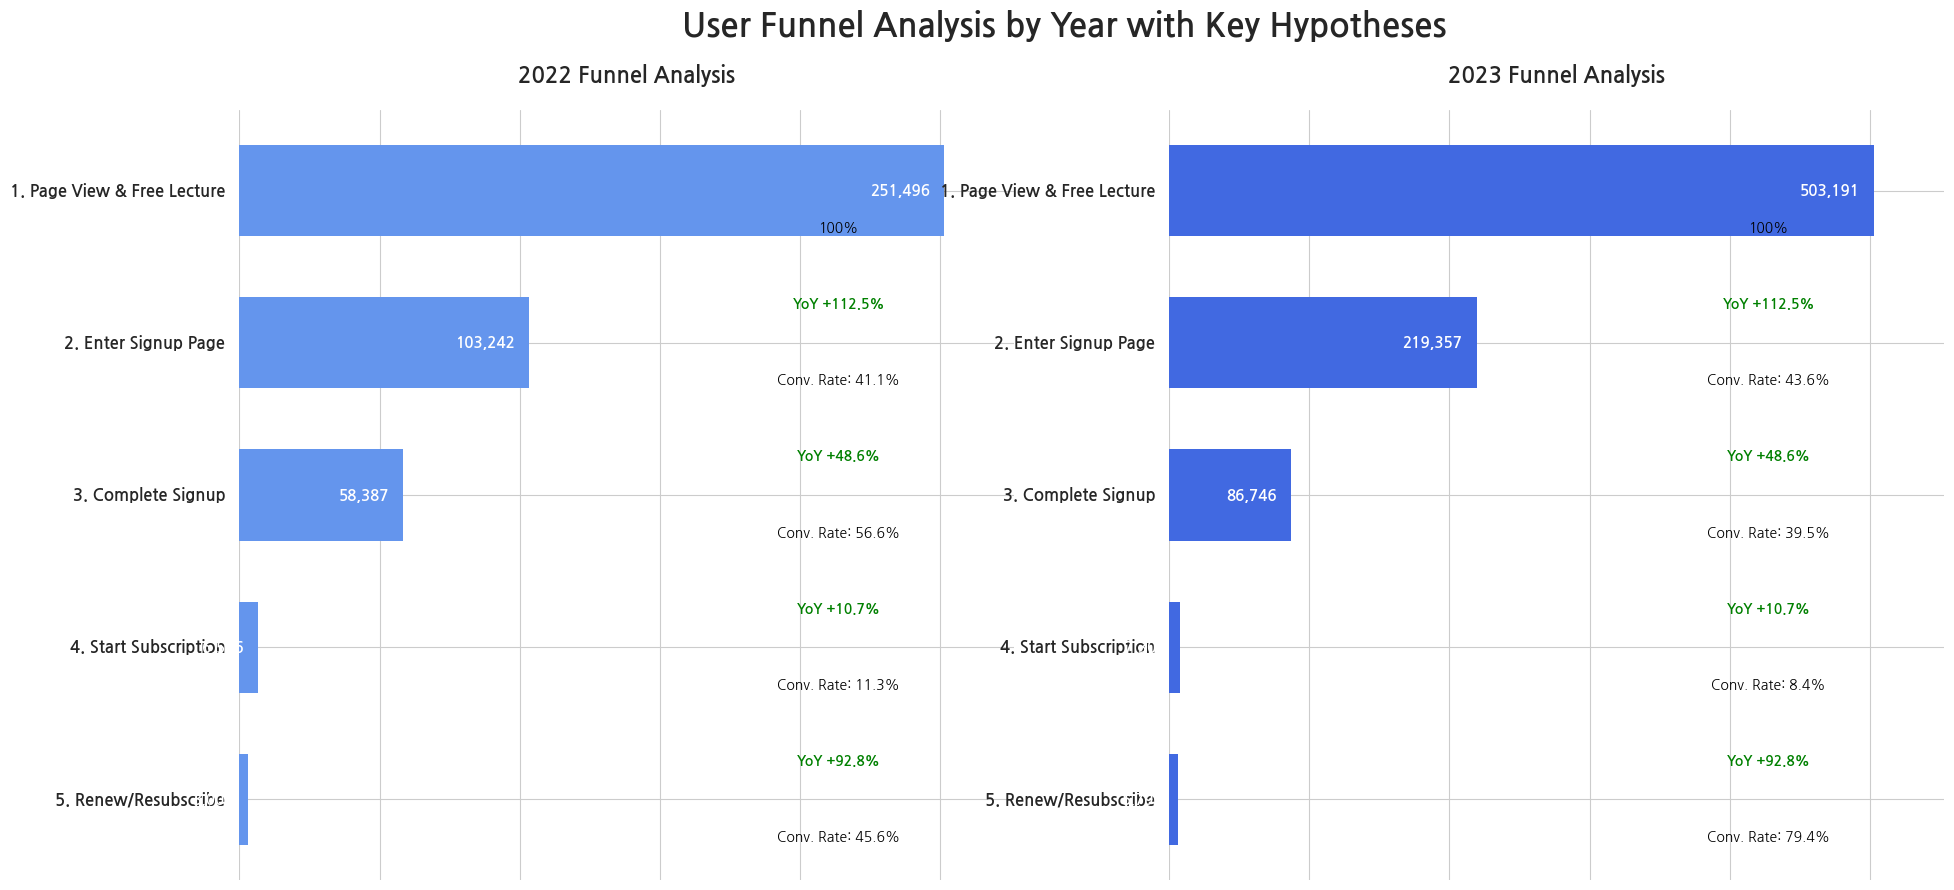

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- Step 1: Prepare Data and Metrics --------------------
# Define the data directly in the code to avoid file I/O errors.
data = {
    'Stage': ['1. Page View & Free Lecture', '2. Enter Signup Page', '3. Complete Signup', '4. Start Subscription', '5. Renew/Resubscribe'],
    '2022': [251496, 103242, 58387, 6596, 3006],
    '2023': [503191, 219357, 86746, 7302, 5796]
}
df = pd.DataFrame(data).set_index('Stage')

# Calculate Year-over-Year (YoY) growth rate
df['YoY_Growth(%)'] = (df['2023'] - df['2022']) / df['2022'] * 100

# Calculate conversion rates for each stage
df['2022_Conversion(%)'] = (df['2022'] / df['2022'].shift(1) * 100).fillna(100)
df['2023_Conversion(%)'] = (df['2023'] / df['2023'].shift(1) * 100).fillna(100)


# -------------------- Step 2: Define Visualization Function --------------------
def plot_funnel_english(ax, year, data, yoy_data, conversion_data, color):
    """A function to draw the funnel chart with annotations on a given axis."""
    y_pos = np.arange(len(data))
    max_val = data.iloc[0]

    ax.barh(y_pos, data, color=color, height=0.6, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels('')
    ax.invert_yaxis()
    ax.set_xlim(0, max_val * 1.1)

    # Clean up the chart appearance
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for i, (stage, value) in enumerate(data.items()):
        # Stage Name
        ax.text(-max_val*0.02, i, stage, ha='right', va='center', fontsize=12, weight='bold')

        # User Count
        ax.text(value - (max_val*0.02), i, f'{value:,}', ha='right', va='center', color='white', fontsize=11, weight='bold')

        # YoY Growth Rate (except for the first stage)
        if i > 0:
            growth = yoy_data.iloc[i]
            growth_text = f'YoY {growth:+.1f}%'
            growth_color = 'green' if growth > 0 else 'red'
            ax.text(max_val * 0.85, i - 0.25, growth_text, ha='center', va='center', color=growth_color, fontsize=10, weight='bold')

        # Conversion Rate
        conv_rate = conversion_data.iloc[i]
        conv_text = f'Conv. Rate: {conv_rate:.1f}%' if i > 0 else '100%'
        ax.text(max_val * 0.85, i + 0.25, conv_text, ha='center', va='center', color='black', fontsize=10, style='italic')

    ax.set_title(f"{year} Funnel Analysis", fontsize=16, weight='bold', pad=20)


# -------------------- Step 3: Create the Final Report Visualization --------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle('User Funnel Analysis by Year with Key Hypotheses', fontsize=24, weight='bold')

# Plot each funnel
plot_funnel_english(ax1, 2022, df['2022'], df['YoY_Growth(%)'], df['2022_Conversion(%)'], 'cornflowerblue')
plot_funnel_english(ax2, 2023, df['2023'], df['YoY_Growth(%)'], df['2023_Conversion(%)'], 'royalblue')

plt.show()

In [48]:
import pandas as pd

# 1-1. 각 콘텐츠의 첫 등장일을 저장할 딕셔너리
content_first_seen = {}

# 1-2. 첫 번째 순회: 각 콘텐츠의 가장 오래된 날짜 찾기
print("✅ 1단계: 전체 콘텐츠의 '첫 등장일'을 계산합니다...")
chunk_iterator = pd.read_csv(
    '/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.lesson_page-002.csv',
    parse_dates=['client_event_time'],
    chunksize=1000000,
    usecols=['client_event_time', 'content.id'] # 필요한 컬럼만 읽어 메모리 효율화
)

for chunk in chunk_iterator:
    # 각 chunk 내에서 content.id별 가장 오래된 시간을 찾음
    chunk_first_seen = chunk.groupby('content.id')['client_event_time'].min()

    # 전체 결과와 비교하여 더 오래된 날짜로 업데이트
    for content_id, time in chunk_first_seen.items():
        if content_id not in content_first_seen or time < content_first_seen[content_id]:
            content_first_seen[content_id] = time

# 1-3. 결과를 다루기 쉬운 Series로 변환
first_seen_series = pd.Series(content_first_seen, name='first_seen_time')
print(f"  - 총 {len(first_seen_series)}개의 고유 콘텐츠 첫 등장일을 계산했습니다.")
print("✅ 1단계 완료.")

✅ 1단계: 전체 콘텐츠의 '첫 등장일'을 계산합니다...
  - 총 181개의 고유 콘텐츠 첫 등장일을 계산했습니다.
✅ 1단계 완료.


In [49]:
import pandas as pd

null_id_enter_lesson_df = pd.read_csv(
    '/content/drive/MyDrive/codeit/Colab Notebooks/project2/null_id_enter_lesson.csv',
    parse_dates=['client_event_time']
)

print(f"---비회원 체험 콘텐츠의 첫 등장일을  계산합니다---")
# 1. [핵심] 'content.id'로 그룹화하여, 각 그룹별 'client_event_time'의 최솟값(가장 오래된 시간)
null_id_first_seen_series = null_id_enter_lesson_df.groupby('content.id')['client_event_time'].min()

# 2. 결과의 이름(name)을 지정하여 Series의 의미를 명확화
null_id_first_seen_series.name = 'first_seen_by_non_member'

# 3. 최종 결과 확인
print(f"\n- 비회원 대상 총 {len(null_id_first_seen_series)}개의 콘텐츠 첫 등장일을 계산했습니다.")
print("✅ 계산 완료.")
print("\n--- 결과 샘플 (상위 5개) ---")
print(null_id_first_seen_series.head())



---비회원 체험 콘텐츠의 첫 등장일을  계산합니다---

- 비회원 대상 총 168개의 콘텐츠 첫 등장일을 계산했습니다.
✅ 계산 완료.

--- 결과 샘플 (상위 5개) ---
content.id
03b4a290c08f7fa83933827a994f2e61   2022-01-07 10:28:06.021
040ccaa97a52e006a2c94bb7c5dce263   2023-11-19 13:57:30.052
079110dd9526425ed3cb7d5c3535707a   2023-12-06 02:41:57.737
07b0a0433178c5eecd11bcae017e5133   2023-11-24 04:28:11.912
0ab2b890d4068c1490b89676773256f6   2022-11-06 11:11:13.176
Name: first_seen_by_non_member, dtype: datetime64[ns]


✅ 1단계: 콘텐츠 첫 등장일을 시간순으로 정렬했습니다.
--- 정렬된 결과 (상위 5개) ---
content.id
595cb4bbfc83e683b0314ca1312cfbde   2021-12-02 15:59:20.836
db43a841c994231e2795d4df8931af50   2021-12-28 14:28:02.585
c269eb6df3a374b464f7c18f12fa398f   2022-01-01 00:03:09.056
ff7998135d650dbefb3f479c900cbcc7   2022-01-01 01:16:32.880
7aea28607643a78c20f67bd678f157d2   2022-01-01 04:18:22.726
Name: first_seen_by_non_member, dtype: datetime64[ns]

✅ 2단계: 콘텐츠 등장 주기를 계산했습니다.
--- 등장 주기 계산 결과 (상위 5개) ---
content.id
595cb4bbfc83e683b0314ca1312cfbde                       NaT
db43a841c994231e2795d4df8931af50   25 days 22:28:41.749000
c269eb6df3a374b464f7c18f12fa398f    3 days 09:35:06.471000
ff7998135d650dbefb3f479c900cbcc7    0 days 01:13:23.824000
7aea28607643a78c20f67bd678f157d2    0 days 03:01:49.846000
Name: first_seen_by_non_member, dtype: timedelta64[ns]

✅ 3단계: 등장 주기에 대한 통계 분석을 수행합니다...

--- 비회원 대상 신규 콘텐츠 등장 주기 통계 ---
count    167.000000
mean       4.149701
std        8.873698
min        0.000000
25%        0.000000
50%

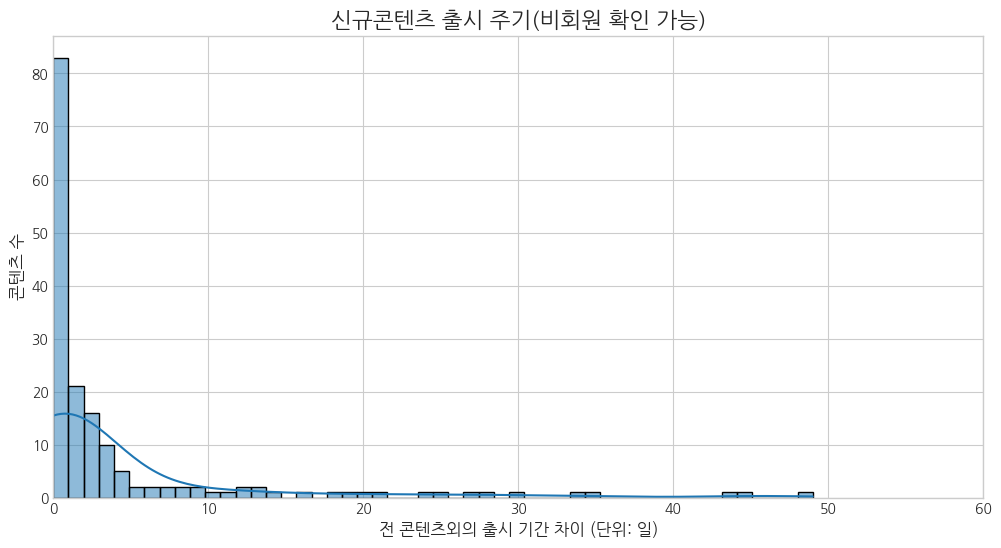

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [가정] 이전 단계에서 null_id_first_seen_series가 생성된 상태
# (index=content.id, values=첫 등장 시간)

# -------------------- 1단계: 첫 등장일을 시간순으로 정렬 --------------------
# .sort_values()를 사용하여 첫 등장 시간을 기준으로 Series를 오름차순(오래된 순)으로 정렬합니다.
sorted_first_seen = null_id_first_seen_series.sort_values(ascending=True)

print("✅ 1단계: 콘텐츠 첫 등장일을 시간순으로 정렬했습니다.")
print("--- 정렬된 결과 (상위 5개) ---")
print(sorted_first_seen.head())


# -------------------- 2단계: 등장일 간의 시간 차이(주기) 계산 --------------------
# .diff() 함수를 사용하여 바로 이전 콘텐츠와의 등장 시간 차이를 계산합니다.
# 첫 번째 콘텐츠는 비교 대상이 없으므로 결과는 NaT(Not a Time)가 됩니다.
appearance_intervals = sorted_first_seen.diff()

print("\n✅ 2단계: 콘텐츠 등장 주기를 계산했습니다.")
print("--- 등장 주기 계산 결과 (상위 5개) ---")
print(appearance_intervals.head())


# -------------------- 3단계: 계산된 주기의 통계 분석 및 시각화 --------------------
print("\n✅ 3단계: 등장 주기에 대한 통계 분석을 수행합니다...")

# .dt.days를 사용하여 시간 차이를 '일(day)' 단위의 숫자로 변환합니다.
# .dropna()로 첫 번째 NaT 값을 제거하고 통계를 계산합니다.
interval_in_days = appearance_intervals.dt.days.dropna()

print("\n--- 비회원 대상 신규 콘텐츠 등장 주기 통계 ---")
print(interval_in_days.describe())

# 시각화: 등장 주기의 분포를 히스토그램으로 확인
plt.rc('font', family='NanumGothic') # Colab 한글 폰트 설정
plt.figure(figsize=(12, 6))
sns.histplot(interval_in_days, bins=50, kde=True)
plt.title('신규콘텐츠 출시 주기(비회원 확인 가능)', fontsize=16)
plt.xlabel('전 콘텐츠외의 출시 기간 차이 (단위: 일)', fontsize=12)
plt.ylabel('콘텐츠 수', fontsize=12)
# x축 범위를 제한하여 분포를 더 자세히 봅니다. (예: 0~60일)
plt.xlim(0, 60)
plt.show()


✅ 3단계: 시계열 그래프를 생성합니다...


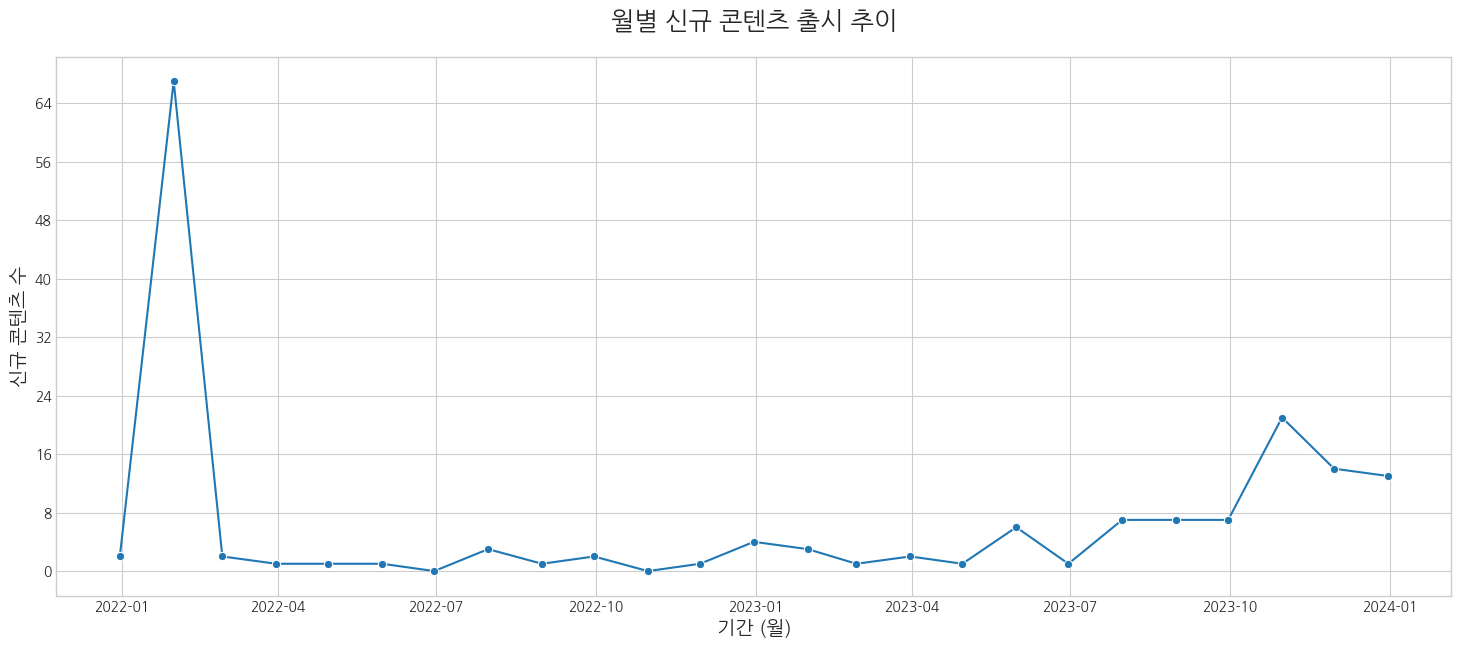

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# [가정] null_id_first_seen_series가 준비된 상태

# -------------------- 1단계: 시계열 분석용 데이터 준비 (동일) --------------------
time_series_df = null_id_first_seen_series.reset_index()
time_series_df.columns = ['content_id', 'first_seen_time']
time_series_df.set_index('first_seen_time', inplace=True)

# -------------------- 2단계: 월별 집계 (동일) --------------------
monthly_new_content_counts = time_series_df.resample('M').count()
monthly_new_content_counts.rename(columns={'content_id': 'new_content_count'}, inplace=True)

# -------------------- 3단계: 시계열 선 그래프 시각화 (수정 완료) --------------------
print("\n✅ 3단계: 시계열 그래프를 생성합니다...")
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(18, 7))

# [수정 완료] y축에 실제 컬럼 이름인 'new_content_count'를 사용합니다.
ax = sns.lineplot(data=monthly_new_content_counts, x=monthly_new_content_counts.index, y='new_content_count', marker='o')

# 그래프 꾸미기 (라벨 수정)
plt.title('월별 신규 콘텐츠 출시 추이', fontsize=18, pad=20)
plt.xlabel('기간 (월)', fontsize=14)
plt.ylabel('신규 콘텐츠 수', fontsize=14)

# y축을 정수로 표시
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.grid(True)
plt.show()

✅ 1단계: 시계열 분석을 위한 데이터프레임 준비 완료.
--- 준비된 데이터 샘플 ---
                                               content_id
first_seen_time                                          
2022-01-07 10:28:06.021  03b4a290c08f7fa83933827a994f2e61
2023-11-19 13:57:30.052  040ccaa97a52e006a2c94bb7c5dce263
2023-12-06 02:41:57.737  079110dd9526425ed3cb7d5c3535707a
2023-11-24 04:28:11.912  07b0a0433178c5eecd11bcae017e5133
2022-11-06 11:11:13.176  0ab2b890d4068c1490b89676773256f6

✅ 2단계: 월별 신규 콘텐츠 등장 횟수 집계 완료.
--- 월별 집계 결과 (상위 5개) ---
                 new_content_count
first_seen_time                   
2021-12-31                       2
2022-01-31                      67
2022-02-28                       2
2022-03-31                       1
2022-04-30                       1

✅ 3단계: 시계열 그래프를 생성합니다...


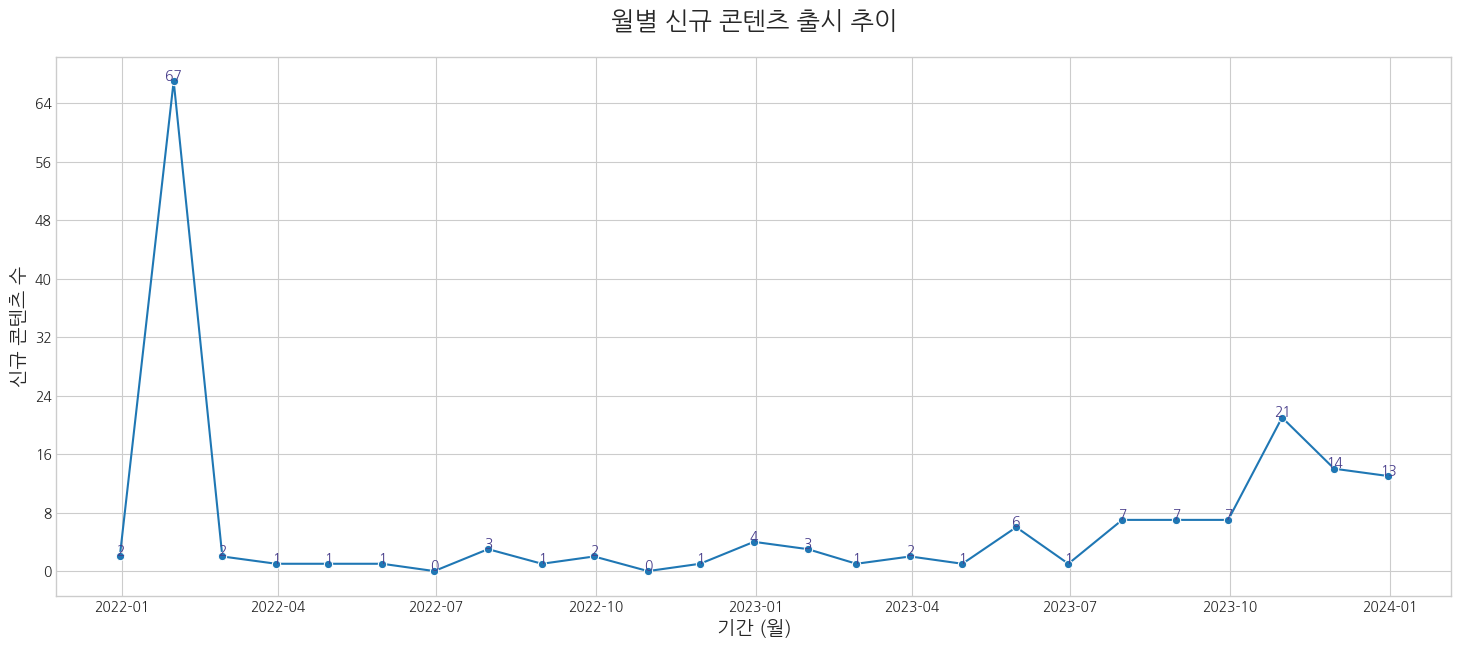

In [52]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- 1단계: 데이터를 시계열 분석에 적합한 형태로 변환 --------------------
# 현재 데이터는 '첫 등장 시간'이 값이므로, 이를 인덱스로 만들어야 시계열 분석이 용이합니다.
# .reset_index()로 인덱스(content.id)와 값(first_seen_by_non_member)을 모두 컬럼으로 변환합니다.
time_series_df = null_id_first_seen_series.reset_index()
time_series_df.columns = ['content_id', 'first_seen_time']

# 'first_seen_time' 컬럼을 데이터프레임의 인덱스로 설정합니다.
time_series_df.set_index('first_seen_time', inplace=True)

print("✅ 1단계: 시계열 분석을 위한 데이터프레임 준비 완료.")
print("--- 준비된 데이터 샘플 ---")
print(time_series_df.head())


# -------------------- 2단계: 월별 신규 콘텐츠 등장 횟수 집계 --------------------
# .resample('M') : 데이터를 '월말(Month-End)' 기준으로 그룹화합니다.
# .count() : 각 월별 그룹에 속한 데이터(콘텐츠)의 개수를 셉니다.
monthly_new_content_counts = time_series_df.resample('M').count()

# 컬럼 이름을 더 명확하게 변경합니다.
monthly_new_content_counts.rename(columns={'content_id': 'new_content_count'}, inplace=True)

print("\n✅ 2단계: 월별 신규 콘텐츠 등장 횟수 집계 완료.")
print("--- 월별 집계 결과 (상위 5개) ---")
print(monthly_new_content_counts.head())
# -------------------- 3단계: 시계열 선 그래프 시각화 (수정 완료) --------------------
print("\n✅ 3단계: 시계열 그래프를 생성합니다...")
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(18, 7))

# [수정 완료] y축에 실제 컬럼 이름인 'new_content_count'를 사용합니다.
ax = sns.lineplot(data=monthly_new_content_counts, x=monthly_new_content_counts.index, y='new_content_count', marker='o')

# --- [수정 완료] 각 점 위에 값을 표시하는 코드 ---
for index, row in monthly_new_content_counts.iterrows():
    # 'new_content_count' 컬럼의 값을 가져와 표시합니다.
    ax.text(index, row['new_content_count'] + 0.2,
            f"{row['new_content_count']}",
            ha='center',
            fontsize=10,
            color='darkslateblue')

# 그래프 꾸미기
plt.title('월별 신규 콘텐츠 출시 추이', fontsize=18, pad=20)
plt.xlabel('기간 (월)', fontsize=14)
plt.ylabel('신규 콘텐츠 수', fontsize=14)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.show()

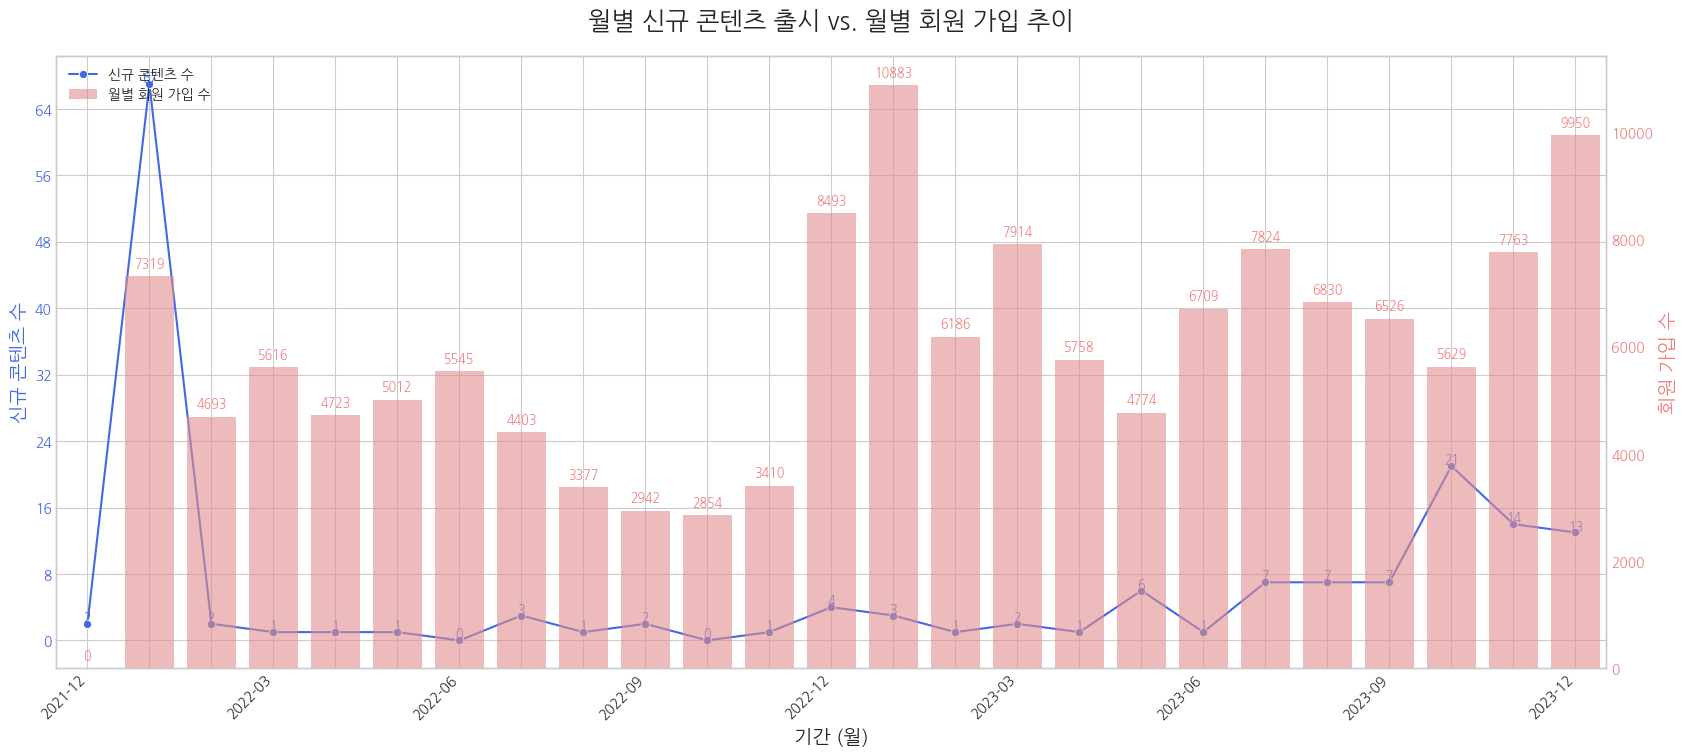

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# [가정] monthly_new_content_counts와 complete_signup_df가 준비된 상태

# -------------------- 1단계: 데이터 준비 (이전과 동일) --------------------
monthly_signups = complete_signup_df.set_index('client_event_time').resample('M')['user_id'].nunique()
monthly_signups_df = monthly_signups.to_frame(name='signup_count')

combined_index = monthly_new_content_counts.index.union(monthly_signups_df.index)
monthly_new_content_counts = monthly_new_content_counts.reindex(combined_index, fill_value=0)
monthly_signups_df = monthly_signups_df.reindex(combined_index, fill_value=0)

monthly_new_content_counts['x_axis'] = monthly_new_content_counts.index.strftime('%Y-%m')
monthly_signups_df['x_axis'] = monthly_signups_df.index.strftime('%Y-%m')


# -------------------- 2단계: 이중 축 차트 시각화 (수정 완료) --------------------
plt.rc('font', family='NanumGothic')
fig, ax1 = plt.subplots(figsize=(20, 9)) # figsize 약간 조정

# --- 첫 번째 Y축 (선 그래프) ---
color_line = 'royalblue'
ax1.set_xlabel('기간 (월)', fontsize=14)
ax1.set_ylabel('신규 콘텐츠 수', color=color_line, fontsize=14)
# [수정] y축에 실제 컬럼 이름 'new_content_count' 사용
sns.lineplot(
    data=monthly_new_content_counts, x='x_axis', y='new_content_count',
    ax=ax1, color=color_line, marker='o', label='신규 콘텐츠 수'
)
ax1.tick_params(axis='y', labelcolor=color_line)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

# [핵심 추가] 선 그래프의 각 점 위에 숫자 표시
for index, row in monthly_new_content_counts.iterrows():
    ax1.text(row['x_axis'], row['new_content_count'] + 0.3, # y 위치를 살짝 위로
             f"{row['new_content_count']}",
             ha='center', fontsize=9, color=color_line)


# --- 두 번째 Y축 (막대 그래프) ---
ax2 = ax1.twinx()
color_bar = 'lightcoral'
ax2.set_ylabel('회원 가입 수', color=color_bar, fontsize=14)
# [수정] y축에 실제 컬럼 이름 'signup_count' 사용
sns.barplot(
    data=monthly_signups_df, x='x_axis', y='signup_count',
    ax=ax2, color=color_bar, alpha=0.6, label='월별 회원 가입 수'
)
ax2.tick_params(axis='y', labelcolor=color_bar)

# [핵심 추가] 막대 그래프의 각 막대 위에 숫자 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points',
                 fontsize=9, color=color_bar)

# x축 라벨이 많아지므로, 일부만 표시 (막대그래프 그린 후 설정)
for i, label in enumerate(ax1.get_xticklabels()):
    if i % 3 != 0: # 3개 중 1개만 표시하여 더 깔끔하게
        label.set_visible(False)


# -------------------- 3단계: 그래프 꾸미기 (동일) --------------------
plt.title('월별 신규 콘텐츠 출시 vs. 월별 회원 가입 추이', fontsize=18, pad=20)
fig.autofmt_xdate(rotation=45)
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax2.legend(lines + bars, labels + bar_labels, loc='upper left')
ax1.get_legend().remove()
plt.grid(False)
plt.show()

## 14일 이내에 신규 콘텐츠를 시청한 기록

In [54]:
# 2-1. 신규 콘텐츠 시청 기록을 저장할 리스트
new_content_log_chunks = []

# 2-2. 두 번째 순회: 각 로그가 신규 콘텐츠 시청인지 판단
print("\n✅ 2단계: 각 로그에 '신규 콘텐츠 여부'를 표시하고 기록을 추출합니다...")
chunk_iterator_2 = pd.read_csv(
    '/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.lesson_page-002.csv',
    parse_dates=['client_event_time'],
    chunksize=1000000
)

for chunk in chunk_iterator_2:
    # chunk의 content.id를 기준으로 '출시일' 정보를 합침(merge)
    merged_chunk = pd.merge(chunk, null_id_first_seen_series, left_on='content.id', right_index=True, how='left')

    # 시청 시간과 출시 시간의 차이 계산
    merged_chunk['days_since_launch'] = (merged_chunk['client_event_time'] - merged_chunk['first_seen_by_non_member']).dt.days

    # 출시 후 14일(2주) 이내에 시청된 기록만 필터링
    new_content_14days_views = merged_chunk[merged_chunk['days_since_launch'] <= 14].copy()

    if not new_content_14days_views.empty:
        new_content_log_chunks.append(new_content_14days_views)

# 2-3. 결과를 하나의 데이터프레임으로 합치기
if new_content_log_chunks:
    new_content_14days_log_df = pd.concat(new_content_log_chunks, ignore_index=True)
    print(f"  - 총 {len(new_content_14days_log_df)}개의 '신규 콘텐츠 시청' 로그를 추출했습니다.")
    print("✅ 2단계 완료.")
else:
    print("❌ '신규 콘텐츠 시청'에 해당하는 로그가 없습니다.")
    new_content_14days_log_df = pd.DataFrame() # 빈 데이터프레임 생성


✅ 2단계: 각 로그에 '신규 콘텐츠 여부'를 표시하고 기록을 추출합니다...
  - 총 482497개의 '신규 콘텐츠 시청' 로그를 추출했습니다.
✅ 2단계 완료.


### 30일 이내에 신규 콘텐츠를 본 기록

In [55]:
# 2-1. 신규 콘텐츠 시청 기록을 저장할 리스트
new_content_30days_log_chunks = []

# 2-2. 두 번째 순회: 각 로그가 신규 콘텐츠 시청인지 판단
print("\n✅ 2단계: 각 로그에 '신규 콘텐츠 여부'를 표시하고 기록을 추출합니다...")
chunk_iterator_3 = pd.read_csv(
    '/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.lesson_page-002.csv',
    parse_dates=['client_event_time'],
    chunksize=1000000
)

for chunk in chunk_iterator_3:
    # chunk의 content.id를 기준으로 '출시일' 정보를 합침(merge)
    merged_chunk = pd.merge(chunk, null_id_first_seen_series, left_on='content.id', right_index=True, how='left')

    # 시청 시간과 출시 시간의 차이 계산
    merged_chunk['days_since_launch'] = (merged_chunk['client_event_time'] - merged_chunk['first_seen_by_non_member']).dt.days

    # 출시 후 30일(1개월) 이내에 시청된 기록만 필터링
    new_content_30days_views = merged_chunk[merged_chunk['days_since_launch'] <= 30].copy()

    if not new_content_30days_views.empty:
        new_content_30days_log_chunks.append(new_content_30days_views)

# 2-3. 결과를 하나의 데이터프레임으로 합치기
if new_content_30days_log_chunks:
    new_content_30days_log_df = pd.concat(new_content_30days_log_chunks, ignore_index=True)
    print(f"  - 총 {len(new_content_30days_log_df)}개의 '신규 콘텐츠 시청' 로그를 추출했습니다.")
    print("✅ 2단계 완료.")
else:
    print("❌ '신규 콘텐츠 시청'에 해당하는 로그가 없습니다.")
    new_content_30days_log_df = pd.DataFrame() # 빈 데이터프레임 생성


✅ 2단계: 각 로그에 '신규 콘텐츠 여부'를 표시하고 기록을 추출합니다...
  - 총 877387개의 '신규 콘텐츠 시청' 로그를 추출했습니다.
✅ 2단계 완료.


### 60일 이내의 신규 콘텐츠를 본 기록

In [56]:
# 2-1. 신규 콘텐츠 시청 기록을 저장할 리스트
new_content_60days_log_chunks = []

# 2-2. 두 번째 순회: 각 로그가 신규 콘텐츠 시청인지 판단
print("\n✅ 2단계: 각 로그에 '신규 콘텐츠 여부'를 표시하고 기록을 추출합니다...")
chunk_iterator_3 = pd.read_csv(
    '/content/drive/MyDrive/codeit/Colab Notebooks/project2/enter.lesson_page-002.csv',
    parse_dates=['client_event_time'],
    chunksize=1000000
)

for chunk in chunk_iterator_3:
    # chunk의 content.id를 기준으로 '출시일' 정보를 합침(merge)
    merged_chunk = pd.merge(chunk, null_id_first_seen_series, left_on='content.id', right_index=True, how='left')

    # 시청 시간과 출시 시간의 차이 계산
    merged_chunk['days_since_launch'] = (merged_chunk['client_event_time'] - merged_chunk['first_seen_by_non_member']).dt.days

    # 출시 후 60일(2개월) 이내에 시청된 기록만 필터링
    new_content_60days_views = merged_chunk[merged_chunk['days_since_launch'] <= 60].copy()

    if not new_content_60days_views.empty:
        new_content_60days_log_chunks.append(new_content_60days_views)

# 2-3. 결과를 하나의 데이터프레임으로 합치기

if new_content_60days_log_chunks:
    new_content_60days_log_df = pd.concat(new_content_60days_log_chunks, ignore_index=True)
    print(f"  - 총 {len(new_content_60days_log_df)}개의 '신규 콘텐츠 시청' 로그를 추출했습니다.")
    print("✅ 2단계 완료.")
else:
    print("❌ '신규 콘텐츠 시청'에 해당하는 로그가 없습니다.")
    new_content_60days_log_df = pd.DataFrame() # 빈 데이터프레임 생성


✅ 2단계: 각 로그에 '신규 콘텐츠 여부'를 표시하고 기록을 추출합니다...
  - 총 1590831개의 '신규 콘텐츠 시청' 로그를 추출했습니다.
✅ 2단계 완료.


In [57]:
from functools import total_ordering
import pandas as pd
import numpy as np

# . 폰트 설정
plt.rc('font', family='NanumGothic')

#  마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 단계 1: new_content_(14, 30, 60일 이내) log_df에서 비회원(user_id가 null)인 데이터만 필터링
non_member_14logs_df = new_content_14days_log_df[new_content_14days_log_df['user_id'].isnull()].copy()
non_member_30logs_df = new_content_30days_log_df[new_content_30days_log_df['user_id'].isnull()].copy()
non_member_60logs_df = new_content_60days_log_df[new_content_60days_log_df['user_id'].isnull()].copy()



# 단계 2: 비회원 데이터의 신규 콘텐츠(출시 14일, 30일, 60일 접근) 로그수 확인
non_member_14log_count = len(non_member_14logs_df)
non_member_30log_count = len(non_member_30logs_df)
non_member_60log_count = len(non_member_60logs_df)


# 단계 3: 비회원 콘텐츠 접근 전체 로그 카운트
null_id_enter_lesson_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/null_id_enter_lesson.csv', parse_dates=['client_event_time'])
total_non_member_log_count = len(null_id_enter_lesson_df)

print(f"\/n--비회원 시청 콘텐츠--")
print(f"14일 이내 콘텐츠를 경험한 비회원 콘텐츠 로그수: {non_member_14log_count} 개")
print(f"30일 이내 콘텐츠를 경험한 비회원 콘텐츠 로그수: {non_member_30log_count} 개")
print(f"60일 이내 콘텐츠를 경험한 비회원 콘텐츠 로그수: {non_member_60log_count} 개")
print(f"전체 비회원 콘텐츠 로그수: {total_non_member_log_count} 개")



# 단계 4: 비회원 데이터의 기존 콘텐츠 접근 로그수 확인
non_member_14log_out_count = total_non_member_log_count-non_member_14log_count
non_member_30log_out_count = total_non_member_log_count-non_member_30log_count
non_member_60log_out_count = total_non_member_log_count-non_member_60log_count


# 단계 5 : 회원가입 완료한 날 기준 비회원 접근 최신 콘텐츠(출시 14일 이내, 30일 이내, 60일 이내)의 양
fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']
key_cols = ['date'] + fingerprint_cols

null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date

complete_signup_df['fingerprint'] = complete_signup_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
complete_signup_df['date'] = complete_signup_df['client_event_time'].dt.date

non_member_14logs_df['fingerprint'] = non_member_14logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_14logs_df['date'] = non_member_14logs_df['client_event_time'].dt.date

non_member_30logs_df['fingerprint'] = non_member_30logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_30logs_df['date'] = non_member_30logs_df['client_event_time'].dt.date

non_member_60logs_df['fingerprint'] = non_member_60logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_60logs_df['date'] = non_member_60logs_df['client_event_time'].dt.date


days_14merge_df = pd.merge(
    non_member_14logs_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 키는 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

days_30merge_df = pd.merge(
    non_member_30logs_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 키는 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

days_60merge_df = pd.merge(
    non_member_60logs_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 키는 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

all_days_merge_df = pd.merge(
    null_id_enter_lesson_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 키는 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

# 단계 6 : 회원가입 완료한 날 기준 비회원 접근 기존 콘텐츠(출시 14일, 30일, 60일 이내)의 양

print(f"가입 전 14일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: {len(days_14merge_df)} 개")
print(f"가입 전 30일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: {len(days_30merge_df)} 개")
print(f"가입 전 60일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: {len(days_60merge_df)} 개")
print(f"비회원이 가입 전  본 콘텐츠 로그수: {len(all_days_merge_df)} 개")


\/n--비회원 시청 콘텐츠--
14일 이내 콘텐츠를 경험한 비회원 콘텐츠 로그수: 17429 개
30일 이내 콘텐츠를 경험한 비회원 콘텐츠 로그수: 41467 개
60일 이내 콘텐츠를 경험한 비회원 콘텐츠 로그수: 61765 개
전체 비회원 콘텐츠 로그수: 1538529 개
가입 전 14일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: 2728 개
가입 전 30일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: 6218 개
가입 전 60일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: 9452 개
비회원이 가입 전  본 콘텐츠 로그수: 194936 개


✅ 1단계: 고유한 일일 사용자(date + fingerprint) 수를 기준으로 분모를 다시 계산합니다...
---14일 내 신규 콘텐츠를 본 전체 사용자수: 2474명---
---30일 내 신규 콘텐츠를 본 전체 사용자수: 4669명---
---60일 내 신규 콘텐츠를 본 전체 사용자수: 8682명---
---14일 내 기존 콘텐츠를 본 전체 사용자수: 86721명---
---30일 내 기존 콘텐츠를 본 전체 사용자수: 84526명---
---60일 내 기존 콘텐츠를 본 전체 사용자수: 80513명---
✅ 2단계: 가입으로 전환된 고유한 일일 사용자 수를 기준으로 분자를 다시 계산합니다...
---14일 내 신규 콘텐츠를 본 가입 전환 사용자수: 340명---
---30일 내 신규 콘텐츠를 본 가입 전환 사용자수: 593명---
---60일 내 신규 콘텐츠를 본 가입 전환 사용자수: 1104명---
---14일 내 기존 콘텐츠를 본 가입 전환 사용자수: 5998명---
---30일 내 기존 콘텐츠를 본 가입 전환 사용자수: 5745명---
---60일 내 기존 콘텐츠를 본 가입 전환 사용자수: 5234명---


---고유 사용자 기준 전환율 계산 ---
        신규 전환율(%)  기존 전환율(%)
14days      13.74       6.92
30days      12.70       6.80
60days      12.72       6.50


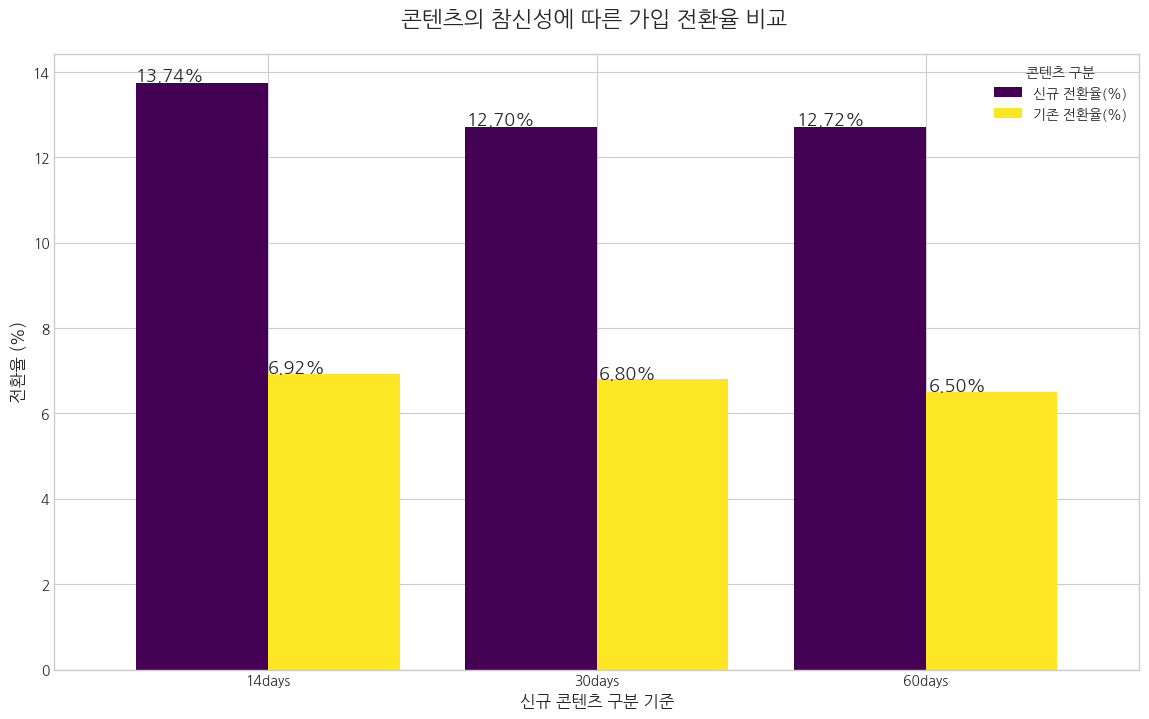

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']
key_cols = ['date'] + fingerprint_cols

null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date

complete_signup_df['fingerprint'] = complete_signup_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
complete_signup_df['date'] = complete_signup_df['client_event_time'].dt.date

non_member_14logs_df['fingerprint'] = non_member_14logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_14logs_df['date'] = non_member_14logs_df['client_event_time'].dt.date

non_member_30logs_df['fingerprint'] = non_member_30logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_30logs_df['date'] = non_member_30logs_df['client_event_time'].dt.date

non_member_60logs_df['fingerprint'] = non_member_60logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_60logs_df['date'] = non_member_60logs_df['client_event_time'].dt.date

days_14merge_df = pd.merge(
    non_member_14logs_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 키는 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

days_30merge_df = pd.merge(
    non_member_30logs_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 키는 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

days_60merge_df = pd.merge(
    non_member_60logs_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 키는 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

all_days_merge_df = pd.merge(
    null_id_enter_lesson_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 키는 중복 제거 후 사용
    on=key_cols,
    how='inner'
)


# -------------------- 1단계: 각 그룹의 '전체 모수(고유 일일 사용자 수)' 재계산 --------------------
print("✅ 1단계: 고유한 일일 사용자(date + fingerprint) 수를 기준으로 분모를 다시 계산합니다...")

# [수정] 고유한 (date, fingerprint) 조합의 개수를 정확하게 계산합니다.
# 신규 그룹
unique_new_14 = len(non_member_14logs_df[['date', 'fingerprint']].drop_duplicates())
unique_new_30 = len(non_member_30logs_df[['date', 'fingerprint']].drop_duplicates())
unique_new_60 = len(non_member_60logs_df[['date', 'fingerprint']].drop_duplicates())

print(f"---14일 내 신규 콘텐츠를 본 전체 사용자수: {unique_new_14}명---")
print(f"---30일 내 신규 콘텐츠를 본 전체 사용자수: {unique_new_30}명---")
print(f"---60일 내 신규 콘텐츠를 본 전체 사용자수: {unique_new_60}명---")

# 기존 그룹
all_non_member_sessions = set(map(tuple, null_id_enter_lesson_df[['date', 'fingerprint']].drop_duplicates().values))
new_14_sessions = set(map(tuple, non_member_14logs_df[['date', 'fingerprint']].drop_duplicates().values))
new_30_sessions = set(map(tuple, non_member_30logs_df[['date', 'fingerprint']].drop_duplicates().values))
new_60_sessions = set(map(tuple, non_member_60logs_df[['date', 'fingerprint']].drop_duplicates().values))

unique_old_14 = len(all_non_member_sessions - new_14_sessions)
unique_old_30 = len(all_non_member_sessions - new_30_sessions)
unique_old_60 = len(all_non_member_sessions - new_60_sessions)

print(f"---14일 내 기존 콘텐츠를 본 전체 사용자수: {unique_old_14}명---")
print(f"---30일 내 기존 콘텐츠를 본 전체 사용자수: {unique_old_30}명---")
print(f"---60일 내 기존 콘텐츠를 본 전체 사용자수: {unique_old_60}명---")

# -------------------- 2단계: 각 그룹의 '가입 전환 사용자 수' 재계산 --------------------
print("✅ 2단계: 가입으로 전환된 고유한 일일 사용자 수를 기준으로 분자를 다시 계산합니다...")

# [수정] 가입으로 전환된 고유한 (date, fingerprint) 조합의 개수를 정확하게 계산합니다.
# 신규 그룹 (가입 전환)
conversions_new_14 = len(days_14merge_df[['date', 'fingerprint']].drop_duplicates())
conversions_new_30 = len(days_30merge_df[['date', 'fingerprint']].drop_duplicates())
conversions_new_60 = len(days_60merge_df[['date', 'fingerprint']].drop_duplicates())

print(f"---14일 내 신규 콘텐츠를 본 가입 전환 사용자수: {conversions_new_14}명---")
print(f"---30일 내 신규 콘텐츠를 본 가입 전환 사용자수: {conversions_new_30}명---")
print(f"---60일 내 신규 콘텐츠를 본 가입 전환 사용자수: {conversions_new_60}명---")


# 기존 그룹 (가입 전환)
all_converted_sessions = set(map(tuple, all_days_merge_df[['date', 'fingerprint']].drop_duplicates().values))
converted_new_14_sessions = set(map(tuple, days_14merge_df[['date', 'fingerprint']].drop_duplicates().values))
converted_new_30_sessions = set(map(tuple, days_30merge_df[['date', 'fingerprint']].drop_duplicates().values))
converted_new_60_sessions = set(map(tuple, days_60merge_df[['date', 'fingerprint']].drop_duplicates().values))

conversions_old_14 = len(all_converted_sessions - converted_new_14_sessions)
conversions_old_30 = len(all_converted_sessions - converted_new_30_sessions)
conversions_old_60 = len(all_converted_sessions - converted_new_60_sessions)

print(f"---14일 내 기존 콘텐츠를 본 가입 전환 사용자수: {conversions_old_14}명---")
print(f"---30일 내 기존 콘텐츠를 본 가입 전환 사용자수: {conversions_old_30}명---")
print(f"---60일 내 기존 콘텐츠를 본 가입 전환 사용자수: {conversions_old_60}명---")


# -------------------- 3단계: '고유 사용자' 기준 전환율 계산 --------------------
print("\n\n---고유 사용자 기준 전환율 계산 ---")

# 각 그룹의 전환율을 계산합니다.
conv_rate_new_14_user = (conversions_new_14 / unique_new_14 * 100) if unique_new_14 > 0 else 0
conv_rate_old_14_user = (conversions_old_14 / unique_old_14 * 100) if unique_old_14 > 0 else 0

conv_rate_new_30_user = (conversions_new_30 / unique_new_30 * 100) if unique_new_30 > 0 else 0
conv_rate_old_30_user = (conversions_old_30 / unique_old_30 * 100) if unique_old_30 > 0 else 0

conv_rate_new_60_user = (conversions_new_60 / unique_new_60 * 100) if unique_new_60 > 0 else 0
conv_rate_old_60_user = (conversions_old_60 / unique_old_60 * 100) if unique_old_60 > 0 else 0

# 결과를 보기 좋은 데이터프레임으로 만듭니다.
conversion_data_user = {
    '신규 전환율(%)': [conv_rate_new_14_user, conv_rate_new_30_user, conv_rate_new_60_user],
    '기존 전환율(%)': [conv_rate_old_14_user, conv_rate_old_30_user, conv_rate_old_60_user]
}
conversion_df_user = pd.DataFrame(conversion_data_user, index=['14days', '30days', '60days'])

print(conversion_df_user.round(2))

# -------------------- 4단계: 시각화 --------------------
# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


ax = conversion_df_user.plot(
    kind='bar',
    figsize=(14, 8),
    rot=0,
    colormap='viridis',
    width=0.8
)

# 각 막대에 퍼센트(%) 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=13)

plt.title('콘텐츠의 참신성에 따른 가입 전환율 비교 ', fontsize=16, pad=20)
plt.xlabel('신규 콘텐츠 구분 기준', fontsize=12)
plt.ylabel('전환율 (%)', fontsize=12)
plt.legend(title='콘텐츠 구분')
plt.show()

전환율 차이가 통계적으로 유의미한가?
카이제곱 검정
1.   귀무가설(H0): 콘텐츠 경험 유형(신규/기존)과 가입 여부의 결과 사이에 아무런 연관이 없다
2.   대립가설(H1): 콘텐츠 경험 유형과 가입 여부사이에는 관련이 있다.


In [59]:
!pip3 install scipy

In [60]:
from scipy.stats import chi2_contingency
import pandas as pd

# -------------------- 1단계: 검정에 필요한 데이터--------------------
# unique_new_14: '14일 이내 신규' 콘텐츠를 경험한 고유 사용자 수 (분모)
# unique_old_14: '14일 기준 기존' 콘텐츠만 경험한 고유 사용자 수 (분모)
# conversions_new_14: '신규' 그룹 중 가입으로 전환된 고유 사용자 수 (분자)
# conversions_old_14: '기존' 그룹 중 가입으로 전환된 고유 사용자 수 (분자)

print("✅ 1단계: 카이제곱 검정을 위한 데이터 준비를 시작합니다...")

# 각 그룹의 '비가입자 수'를 계산합니다. (전체 - 가입자)
non_conversions_new_14 = unique_new_14 - conversions_new_14
non_conversions_old_14 = unique_old_14 - conversions_old_14

# 2x2 분할표(Contingency Table)를 생성합니다.
# 표의 형태: [[신규-가입, 신규-비가입], [기존-가입, 기존-비가입]]
observed_values = [
    [conversions_new_14, non_conversions_new_14],
    [conversions_old_14, non_conversions_old_14]
]

# 보기 쉽게 데이터프레임으로도 만들어 봅니다.
contingency_table = pd.DataFrame(
    observed_values,
    columns=['가입 (전환)', '비가입 (비전환)'],
    index=['신규 콘텐츠 경험 그룹', '기존 콘텐츠 경험 그룹']
)

print("\n--- [분할표] 카이제곱 검정 입력 데이터 ---")
print(contingency_table)


# -------------------- 2단계: 카이제곱 검정 수행 및 결과 해석 --------------------
print("\n✅ 2단계: 카이제곱 검정을 수행하고 결과를 해석합니다...")

# scipy.stats 라이브러리의 chi2_contingency 함수를 사용합니다.
chi2_statistic, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- [14일 기준] 카이제곱 검정 결과 ---")
print(f"카이제곱 통계량 (Chi-squared Statistic): {chi2_statistic:.4f}")
print(f"p-value: {p_value:.10f}") # p-value는 매우 작을 수 있으므로 길게 표시

# p-value를 기준으로 통계적 결론을 내립니다.
alpha = 0.05  # 유의수준 5% (업계 표준)

print("\n--- 최종 결론 ---")
if p_value < alpha:
    print(f"✅ p-value ({p_value:.4f})가 유의수준 ({alpha})보다 작습니다.")
    print("   따라서, '두 그룹의 전환율이 같다'는 귀무가설을 기각합니다.")
    print("   결론: 신규/기존 콘텐츠 경험 여부에 따른 가입 전환율의 차이는 통계적으로 유의미합니다.")
else:
    print(f"❌ p-value ({p_value:.4f})가 유의수준 ({alpha})보다 크거나 같습니다.")
    print("   따라서, '두 그룹의 전환율이 같다'는 귀무가설을 기각할 수 없습니다.")
    print("   결론: 두 그룹 간의 전환율 차이가 통계적으로 유의미하다고 말할 수 없습니다.")

✅ 1단계: 카이제곱 검정을 위한 데이터 준비를 시작합니다...

--- [분할표] 카이제곱 검정 입력 데이터 ---
              가입 (전환)  비가입 (비전환)
신규 콘텐츠 경험 그룹      340       2134
기존 콘텐츠 경험 그룹     5998      80723

✅ 2단계: 카이제곱 검정을 수행하고 결과를 해석합니다...

--- [14일 기준] 카이제곱 검정 결과 ---
카이제곱 통계량 (Chi-squared Statistic): 168.7833
p-value: 0.0000000000

--- 최종 결론 ---
✅ p-value (0.0000)가 유의수준 (0.05)보다 작습니다.
   따라서, '두 그룹의 전환율이 같다'는 귀무가설을 기각합니다.
   결론: 신규/기존 콘텐츠 경험 여부에 따른 가입 전환율의 차이는 통계적으로 유의미합니다.


✅ 1단계: 모든 비회원 활동과 가입 기록을 연결합니다...
✅ 1단계 완료: '가입에 기여한 활동' 데이터를 생성했습니다.

✅ 2단계: 각 활동을 신규/기존으로 분류합니다...
✅ 2단계 완료: 각 활동에 신규성 그룹을 부여했습니다.

 /new content group signup relation
content_age_group
60days over    5285
31~60 days      375
15~30 days      148
~14 days        124
Name: count, dtype: int64


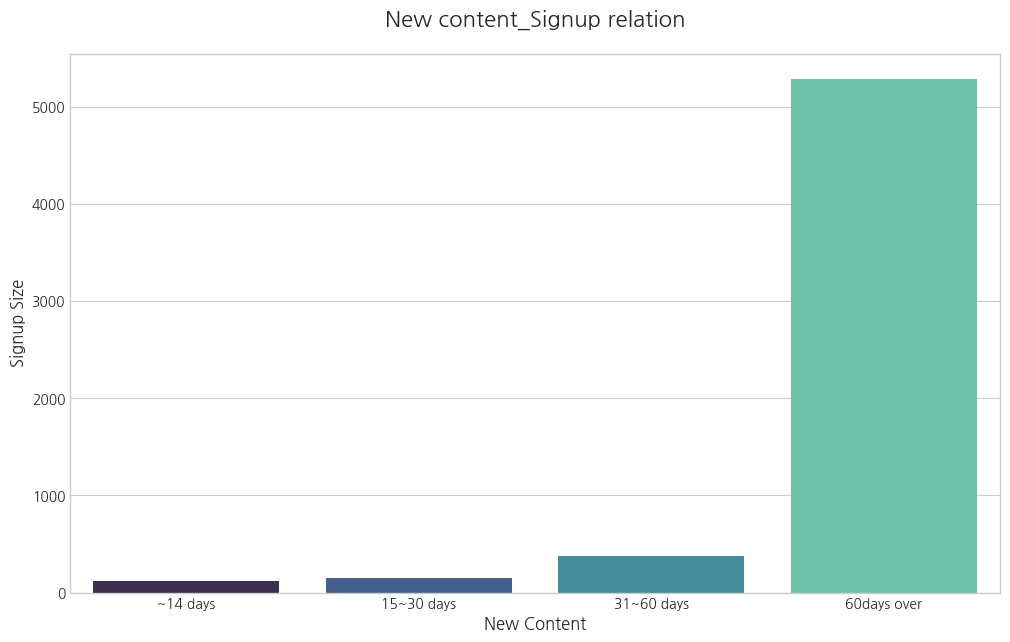

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# . 폰트 설정
plt.rc('font', family='NanumGothic')

#  마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# [가정]
# 1. null_id_enter_lesson_df: user_id가 null인 모든 레슨 페이지 방문 로그
# 2. complete_signup_df: 회원가입 완료 로그
# 3. first_seen_series: 각 콘텐츠의 '첫 등장일' 정보가 담긴 Series

# -------------------- 1단계: 모든 비회원 활동과 회원가입 연결 --------------------
print("✅ 1단계: 모든 비회원 활동과 가입 기록을 연결합니다...")

# 비회원 데이터에 지문 생성
fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']
null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date

# 회원가입 데이터에 지문 생성
complete_signup_df['fingerprint'] = complete_signup_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
complete_signup_df['date'] = complete_signup_df['client_event_time'].dt.date

attributed_df = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'client_event_time', 'content.id']],
    complete_signup_df[['date', 'fingerprint', 'user_id', 'client_event_time']],
    on=['date', 'fingerprint'],
    suffixes=('_watch', '_signup')
)
attributed_df = attributed_df[attributed_df['client_event_time_watch'] < attributed_df['client_event_time_signup']].copy()
attributed_df['time_diff'] = attributed_df['client_event_time_signup'] - attributed_df['client_event_time_watch']

# [수정된 부분] inplace=True를 사용하지 않고, 결과를 새로운 변수에 할당합니다.
sorted_df = attributed_df.sort_values(by='time_diff', ascending=True)
final_attributed_df = sorted_df.drop_duplicates(subset=['user_id', 'client_event_time_signup'], keep='first')

print("✅ 1단계 완료: '가입에 기여한 활동' 데이터를 생성했습니다.")


# -------------------- 2단계: 각 활동의 '신규성' 분류 (이제 정상 작동) --------------------
print("\n✅ 2단계: 각 활동을 신규/기존으로 분류합니다...")
analysis_df = pd.merge(
    final_attributed_df,
    first_seen_series,
    left_on='content.id',
    right_index=True,
    how='left'
)
analysis_df['days_since_launch'] = (analysis_df['client_event_time_watch'] - analysis_df['first_seen_time']).dt.days
bins = [-1, 14, 30, 60, float('inf')]
labels = ['~14 days', '15~30 days', '31~60 days', '60days over']
analysis_df['content_age_group'] = pd.cut(analysis_df['days_since_launch'], bins=bins, labels=labels, right=True)

print("✅ 2단계 완료: 각 활동에 신규성 그룹을 부여했습니다.")


# -------------------- 3단계 & 4단계: 집계 및 시각화 (이전과 동일) --------------------
signup_counts_by_age = analysis_df['content_age_group'].value_counts()
print("\n /new content group signup relation")
print(signup_counts_by_age)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=signup_counts_by_age.index, y=signup_counts_by_age.values, palette='mako', order=labels)

plt.title('New content_Signup relation', fontsize=16, pad=20)
plt.xlabel('New Content', fontsize=12)
plt.ylabel('Signup Size', fontsize=12)
plt.show()

In [ ]:
enter_page_df['os_name'].value_counts()